In [1]:
!pip install optuna
!pip install pmdarima
!pip install pmdarima scipy==1.2 -Uqq
!pip install yellowbrick==0.9.1 scikit-learn==0.22.2
!pip install sktime --ignore-installed
!pip install delayed
!pip install fbprophet
!pip install tbats
!pip install workalendar

import optuna
import os
import warnings
warnings.filterwarnings("ignore")  # avoid printing out absolute paths
# os.chdir("../../..")
import pandas as pd
import numpy as np
from pyspark.sql.functions import *
from pyspark.sql.window import Window
from pyspark.sql.types import *
from pyspark import SparkConf
from pyspark.sql import SparkSession

import sys, os, time
import matplotlib.cm as cm

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import pandas as pd
from workalendar.core import Calendar
from workalendar.registry import registry
from pandas.tseries.offsets import BDay
import numpy as np
from pandas.tseries.holiday import (
    AbstractHolidayCalendar, Holiday, DateOffset, \
    SU, MO, TU, WE, TH, FR, SA, \
    next_monday, nearest_workday, sunday_to_monday,
    EasterMonday, GoodFriday, Easter
)
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error#, mean_absolute_percentage_error


from datetime import datetime
import statistics

import random



from sklearn.preprocessing import OneHotEncoder
from dateutil.relativedelta import relativedelta

import re
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from torch.utils.data import Dataset, DataLoader

spark = SparkSession \
    .builder \
    .appName("WMX - impr forecast - KT") \
    .enableHiveSupport()\
    .config("hive.exec.dynamic.partition", "true")\
    .config("hive.exec.dynamic.partition.mode", "nonstrict")\
    .config("spark.sql.catalogImplementation","hive")\
    .config("spark.sql.hive.convertMetastoreOrc", "false")\
    .config("spark.executor.memory", "3G")\
    .config("spark.driver.memory", "3G")\
    .config("spark.network.timeout", "43200")\
    .config("spark.rdd.compress", "true")\
    .config("spark.cores.max", "512")\
    .config("spark.default.parallelism", "256")\
    .config("spark.dynamicAllocation.minExecutors", "64")\
    .config("spark.dynamicAllocation.maxExecutors", "2048")\
    .config("spark.executor.memoryOverhead", "1G")\
    .config("spark.sql.hive.convertMetastoreOrc", "false")\
    .config("spark.sql.execution.arrow.enabled","true")\
    .config("spark.sql.execution.arrow.pyspark.enabled", "true")\
    .config("spark.driver.maxResultSize","0")\
    .config("spark.memory.offHeap.enabled","true") \
    .config("spark.memory.offHeap.size","1g")\
    .config('spark.jars', 'gs://spark-lib/bigquery/spark-bigquery-latest_2.11.jar')\
    .getOrCreate()

Looking in indexes: https://repository.walmart.com/repository/pypi-proxy/simple/
Looking in indexes: https://repository.walmart.com/repository/pypi-proxy/simple/
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.9.0 requires numpy<=1.19.3, but you have numpy 1.19.5 which is incompatible.
sktime 0.9.0 requires statsmodels<=0.12.1, but you have statsmodels 0.12.2 which is incompatible.
Looking in indexes: https://repository.walmart.com/repository/pypi-proxy/simple/
  Using cached https://repository.walmart.com/repository/pypi-proxy/packages/scikit-learn/scikit_learn-0.22.2-cp36-cp36m-manylinux1_x86_64.whl?originalHref=aHR0cHM6Ly9maWxlcy5weXRob25ob3N0ZWQub3JnL3BhY2thZ2VzL2UxLzdmLzM2NmRjYmExYmEwNzZhODhhNTBiZWE3MzJkYmMwMzNjMGM1YmJmNzg3NjAxMGU2ZWRjNjc5NDg1NzlkNS9zY2lraXRfbGVhcm4tMC4yMi4yLWNwMzYtY3AzNm0tbWFueWxpbnV4MV94ODZfNjQud2hsI3NoYTI1Nj1iYzhiMzdjYTBkZTc5ND

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(torch.cuda.current_device()))
import os
import warnings
warnings.filterwarnings("ignore")  # avoid printing out absolute paths
# os.chdir("../../..")
import pandas as pd
import numpy as np
from pyspark.sql.functions import *
from pyspark.sql.window import Window
from pyspark.sql.types import *
from pyspark import SparkConf
from pyspark.sql import SparkSession

import sys, os, time
import matplotlib.cm as cm

import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error#, mean_absolute_percentage_error


from datetime import datetime
import statistics

import random



from sklearn.preprocessing import OneHotEncoder
from dateutil.relativedelta import relativedelta

import re
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from torch.utils.data import Dataset, DataLoader

import os
import warnings
warnings.filterwarnings("ignore")  # avoid printing out absolute paths
# os.chdir("../../..")
import pandas as pd
import numpy as np
from pyspark.sql.functions import *
from pyspark.sql.window import Window
from pyspark.sql.types import *
from pyspark import SparkConf
from pyspark.sql import SparkSession
import os,sys
import torch
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from dateutil.relativedelta import relativedelta
import numpy as np
import pandas as pd
import re
import os
import sys, os, time
import matplotlib.cm as cm

import matplotlib.pyplot as plt

import matplotlib.ticker as mticker

import torch
import torch.nn as nn

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error#, mean_absolute_percentage_error


from datetime import datetime
import statistics

import random
import time
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from dateutil.relativedelta import relativedelta


import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


import time
from torch.optim.lr_scheduler import ExponentialLR

import sys, os, time
import matplotlib.cm as cm

import torch
import torch.nn as nn

from datetime import datetime
import statistics

import random
import time
import optuna
from optuna.trial import TrialState
import torch.nn.functional as F

import os,sys
import torch
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from dateutil.relativedelta import relativedelta
import re
import os
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from dateutil.relativedelta import relativedelta
import torch
from sklearn import preprocessing
from dateutil.relativedelta import relativedelta
# from ray import tune
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
#le = preprocessing.LabelEncoder()
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from dateutil.relativedelta import relativedelta
# from ray import tune
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

cuda:0
1
Tesla V100-SXM2-16GB


In [3]:
import pmdarima as pmd
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
import sktime
import delayed
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.ets import AutoETS
from warnings import simplefilter

from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import (
    EnsembleForecaster,
    MultiplexForecaster,
    TransformedTargetForecaster,
    make_reduction,
)
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.model_selection import (
    ExpandingWindowSplitter,
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.forecasting.theta import ThetaForecaster
from statsmodels.tsa.api import STLForecast
from sktime.forecasting.bats import BATS
from sktime.forecasting.tbats import TBATS
from sktime.forecasting.croston import Croston
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt



In [4]:

from __future__ import print_function
import sys, os, time
import matplotlib.cm as cm

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd

import torch
import torch.nn as nn

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error#, mean_absolute_percentage_error


from datetime import datetime
import statistics

import random
import time

from tqdm.auto import tqdm

# import darts
# from darts import TimeSeries
# from darts.metrics import *
# from darts.utils.missing_values import fill_missing_values

import warnings
from pyspark.sql import Window
import pyspark.sql.functions as f

import os,sys
import torch
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from dateutil.relativedelta import relativedelta
import numpy as np
import pandas as pd
import re
import os
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from dateutil.relativedelta import relativedelta
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, Conv1D, MaxPooling1D, Flatten, Bidirectional, Input, Flatten, Activation, Reshape, RepeatVector, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import torch
from sktime.forecasting.fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [5]:
from sklearn import linear_model

import sys, os, time
import matplotlib.cm as cm

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd

import torch
import torch.nn as nn

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error#, mean_absolute_percentage_error

from sklearn import linear_model
from datetime import datetime
import statistics

import random
import time

from tqdm.auto import tqdm

# import darts
# from darts import TimeSeries
# from darts.metrics import *
# from darts.utils.missing_values import fill_missing_values

import warnings
from pyspark.sql import Window
import pyspark.sql.functions as f

import os,sys
import torch
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from dateutil.relativedelta import relativedelta
import numpy as np
import pandas as pd
import re
import os
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from dateutil.relativedelta import relativedelta
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, Conv1D, MaxPooling1D, Flatten, Bidirectional, Input, Flatten, Activation, Reshape, RepeatVector, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import torch


In [6]:
class dataprep:
    def __init__(self, df, input_window=90, output_window=30, stride=1, start='2020-11-01'):
        # le = preprocessing.LabelEncoder()
        df['ds'] = pd.to_datetime(df['ds'], format='%Y-%m-%d')
        start = pd.to_datetime(start, format='%Y-%m-%d') #+ relativedelta(months=months)
        end = start + relativedelta(days=365 + 30) #+ relativedelta(months=months)
        # start1=df.ds.sort_values()[0]
        # end1=df.ds.sort_values()[len(df_panda)-1]
        # if end1<end:end=end1
        # if start1>start:start=start1
        # print(start,end)
        df = df[(df.ds >= start) & (df.ds <= end)]


        df['query_idx'] = df['query_idx'].map(str)
        df.sort_values('ds', inplace=True)
        if df['ds'].iloc[-1]!=end:
            last_date=df.iloc[-1,:]
            last_date['ds']=end
            last_date['daily_supply'] = 0
            df = df.append(last_date)
        if df['ds'].iloc[0]!=start:
            first_date=df.iloc[0,:]
            first_date['ds']=end
            first_date['daily_supply'] = 0
            df = df.append(first_date)
        df.sort_values('ds', inplace=True)
        df['grp'] = df.apply(
            lambda x: '%s_%s_%s_%s' % (x['group_id'], x['query_idx'], x['SearchKeyValue'], x['LocationKeyValue']),
            axis=1)
        dts = (end - start).days + 1

        qr = df.groupby(['grp'])['daily_supply'].count()
        self.df_test=df[['ds','daily_supply','grp']]
##############################
        qrs = list(qr[(dts - qr) <= 50].index)

        df = df.loc[df['grp'].isin(qrs)]
##############################

        df.sort_values('ds', inplace=True)
        # df.set_index(['ds', 'grp'], append=True,inplace=True)
        # df= df.unstack(fill_value=0)\
        # df=df.asfreq('D', fill_value=0).stack(). \
        #     sort_index(level=1).reset_index()


        try:
            df = df.set_index(['ds', 'grp']).unstack(fill_value=0). \
            asfreq('D', fill_value=0).stack(). \
            sort_index(level=1).reset_index()
        except:
            df = df.groupby(['ds', 'grp']).agg({'daily_supply':['sum'],'group_id':['first'],'query_idx':['first'], 'SearchKeyValue':['first'], 'LocationKeyValue':['first']})
            df = df.unstack(fill_value=0). \
                asfreq('D', fill_value=0).stack(). \
                sort_index(level=1).reset_index()
            df.columns = df.columns.get_level_values(0)
        #cls = ['year', 'month', 'week', 'quarter', 'dayofweek', 'isWeekend', 'Trend', 'weeklyChange', 'priceMov',
        #       'Season', 'isHoliday', 'isPromotion', 'dayofyear_sin', 'dayofyear_cos', 'month_sin', 'month_cos']
        df.sort_values('ds', inplace=True)
        #df[cls] = df[cls].replace(to_replace=0, method='ffill')  # **********
        #df[cls] = df[cls].replace(to_replace=0, method='bfill')
        self.df = df
        self.test_split_date = pd.to_datetime((end + relativedelta(days=-30)).strftime('%Y-%m-%d'))
        ####################################################################################
        self.val_split_date = pd.to_datetime((self.test_split_date + relativedelta(days=-90)).strftime('%Y-%m-%d'))

        self.df = self.df.drop(['group_id', 'query_idx', 'SearchKeyValue', 'LocationKeyValue'], axis=1)

        self.df_trains = self.df[self.df.ds <= self.val_split_date]
        self.df_tests = self.df[self.df.ds > self.test_split_date]
        df_train_temp = self.df[self.df.ds <= self.test_split_date]

        self.df_test_org = pd.pivot_table(self.df_tests, values='daily_supply', index=['ds'], columns=['grp'])
        self.df_train_org = pd.pivot_table(df_train_temp, values='daily_supply', index=['ds'],columns=['grp'])  # ,aggfunc=np.sum

        self.df_train_org.sort_index(inplace=True)
        # print(self.df_train_org.iloc[:,0])
        # print(self.df_train_org.iloc[-14:,0])

        # $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
        self.q_train = self.df_train_org.iloc[-14:, :].sum(axis=0) / np.sum(np.sum(self.df_train_org.iloc[-14:, :]))
        self.q_test = self.df_test_org.sum(axis=0) / np.sum(np.sum(self.df_test_org))
        del self.df_train_org
        del self.df_trains
        del self.df_tests
        del df_train_temp
        self.df = self.df.groupby('ds').agg(
            {'daily_supply': 'sum'
             #,'shifted_annual_daily_supply': 'sum', 'year': lambda x: x.iloc[0],
             #'month': lambda x: x.iloc[0],
             #'week': lambda x: x.iloc[0], 'quarter': lambda x: x.iloc[0], 'dayofweek': lambda x: x.iloc[0],
             #'isWeekend': lambda x: x.iloc[0], 'Trend': lambda x: x.value_counts().index[0], 'Trend_Var': 'sum',
             #'weeklyChange': lambda x: x.value_counts().index[0], 'priceMov': lambda x: x.value_counts().index[0],
             #'Season': lambda x: x.iloc[0],
             #'isHoliday': lambda x: x.iloc[0], 'isPromotion': lambda x: x.iloc[0], 'dayofyear_sin': lambda x: x.iloc[0],
             #'dayofyear_cos': lambda x: x.iloc[0], 'month_sin': lambda x: x.iloc[0], 'month_cos': lambda x: x.iloc[0]
             })

        self.inp = input_window
        self.out = output_window
        self.stride = stride

    def _get_data(self):
        # strCol = ['year', 'month', 'week', 'quarter', 'dayofweek', 'isWeekend', 'Trend', 'weeklyChange', 'priceMov',
        #           'Season', 'isHoliday',
        #           'isPromotion']  # *******************************************************************
        # for cols in strCol:
        #     encoder = OneHotEncoder()
        #     encoder_df = pd.DataFrame(encoder.fit_transform(self.df[[cols]]).toarray())
        #     column_name = encoder.get_feature_names([cols])
        #     encoder_df.columns = column_name
        #     encoder_df.index = self.df.index
        #     self.df = self.df.join(encoder_df)
        #     self.df = self.df.drop(cols, axis=1)

        Cols_minmax = ['daily_supply',
                       # 'shifted_annual_daily_supply', 'Trend_Var', 'dayofyear_sin', 'dayofyear_cos',
                       # 'month_sin', 'month_cos'
                       ]
        for cols in Cols_minmax:
            if cols != 'shifted_annual_daily_supply':
                self.scaler_fz = MinMaxScaler(feature_range=(-1, 1))
                self.scaler_fz = self.scaler_fz.fit(self.df[cols].values.reshape(-1, 1))
            if cols == 'daily_supply':
                self.scaler_f = self.scaler_fz
            self.df[cols] = self.scaler_fz.transform(self.df[cols].values.reshape(-1, 1))

        self.df_train = self.df[self.df.index <= self.val_split_date]
        self.df_val = self.df[(self.df.index > self.val_split_date) & (self.df.index <= self.test_split_date)]
        self.df_test = self.df[self.df.index > self.test_split_date]

        train_date, test_date = list(self.df_train.index), list(self.df_test.index)

        average = 0

        try: val_shape = self.df_val['daily_supply'].shape[0]
        except:val_shape = self.df_val.shape[0]
        self.df_train.reset_index(inplace=True, drop=True)
        self.df_val.reset_index(inplace=True, drop=True)
        self.df_test.reset_index(inplace=True, drop=True)


        if self.inp > val_shape:
            df_test = np.concatenate([self.df_train.iloc[-(self.inp - val_shape):], self.df_val, self.df_test], axis=0)
            df_val = np.concatenate([self.df_train.iloc[-self.inp:], self.df_val], axis=0)
        else:
            df_test = np.concatenate([self.df_val.iloc[:, :][-self.inp:], self.df_test], axis=0)#$$$$$$need to change for more features
            df_val = np.concatenate([self.df_train.iloc[-self.inp:], self.df_val], axis=0)#$$$$$$need to change for more features
        self.df_test, self.df_val = df_test, df_val
        df_test = pd.DataFrame(df_test)
        try:df_test.columns = self.df_train.columns
        except:df_test.name = self.df_train.name

        df_val = pd.DataFrame(df_val)
        try:df_val.columns = self.df_train.columns
        except:df_val.name = self.df_train.name

        self.df_val, self.df_test = df_val, df_test

        X_train, Y_train = self.sliding_windows(self.df_train, seq_length_x=self.inp, seq_length_y=self.out,
                                                time_step=self.stride)
        X_val, Y_val = self.sliding_windows(self.df_val, seq_length_x=self.inp, seq_length_y=self.out,
                                            time_step=self.stride)
        X_test, Y_test = self.sliding_windows(self.df_test, seq_length_x=self.inp, seq_length_y=self.out,
                                              time_step=self.stride)
        return X_train, Y_train, X_val, Y_val, X_test, Y_test, self.df_test_org.values, self.q_train, self.q_test

    def sliding_windows(self, data, seq_length_x, seq_length_y, time_step):
        x = []
        y = []
        for i in range(0, len(data) - seq_length_x - seq_length_y + 1, time_step):
            try:
                _x = data.iloc[i:(i + seq_length_x), :].values
                _y = data.loc[i + seq_length_x:i + seq_length_x + seq_length_y - 1,'daily_supply'].values
            except:
                _x = data.iloc[i:(i + seq_length_x)].values
                _y = data.loc[i + seq_length_x:i + seq_length_x + seq_length_y - 1].values
              # data.loc[i + seq_length_x:i + seq_length_x + seq_length_y,'daily_supply'].values
            x.append(_x)
            y.append(_y)
        return np.array(x), np.array(y)


In [7]:
class Data(Dataset):
    def __init__(self, x, y):
        np.random.seed(int(43))
        super(Data, self).__init__()
        # store the raw tensors
        self._x = x
        self._y = y

    def __len__(self):
    # a DataSet must know it size
        return self._x.shape[0]

    def __getitem__(self, index):
        x = self._x[index, :]
        y = self._y[index, :]
        return x, y
    
class LSTM(nn.Module):

    def __init__(self, output_size, input_size=1, hidden_size=4, num_layers=1, dropout=.3,relu='False'):
        super(LSTM, self).__init__()

        self.output_size = output_size
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.relu=relu
        # self.dp = nn.Dropout(dropout)
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True, dropout=dropout)  # .25
        # self.batchnorm=nn.BatchNorm1d(hidden_size)
        self.rel=nn.LeakyReLU(hidden_size)
        # self.fc = nn.Linear(hidden_size, hidden_size)
        # self.dp = nn.Dropout(.5)
        self.fc=nn.Linear(hidden_size, output_size)
    def forward(self, x):
        for it in self.lstm.parameters():
            w = it
            break

        h_0 = w.new_zeros(
            self.num_layers, x.size(0), self.hidden_size, requires_grad=w.requires_grad).to(self.device)

        c_0 = w.new_zeros(
            self.num_layers, x.size(0), self.hidden_size, requires_grad=w.requires_grad).to(self.device)

        # Propagate input through LSTM

        h_out, _ = self.lstm(x, (h_0, c_0))
        #h_out.requires_grad_()
        h_out = h_out[:, -1, :]
        h_out = h_out.reshape(-1, self.hidden_size)
        #out = self.dp(h_out)

        #out = self.batchnorm(h_out)
        if self.relu=='True':
            h_out=  self.rel(h_out)
        # out=  self.fc(h_out)
        # out = self.dp(out)
        out = self.fc(h_out)
        #out.requires_grad_()
        return out
class LSTM3(nn.Module):

    def __init__(self, output_size, input_size=1, hidden_size=4, num_layers=1,dropout=.1):
        super(LSTM, self).__init__()

        self.output_size = output_size
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True,dropout = .2)
        self.batchnorm=nn.BatchNorm1d(hidden_size)
        self.dp=nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size, output_size)


    def forward(self, x):
        for it in self.lstm.parameters():
            w = it
            break

        h_0 = w.new_zeros(
            self.num_layers, x.size(0), self.hidden_size, requires_grad=w.requires_grad).to(self.device)

        c_0 = w.new_zeros(
            self.num_layers, x.size(0), self.hidden_size, requires_grad=w.requires_grad).to(self.device)

        # Propagate input through LSTM

        h_out, _ = self.lstm(x, (h_0, c_0))
        h_out.requires_grad_()
        h_out = h_out[:, -1, :]
        h_out = h_out.reshape(-1, self.hidden_size)
        out=self.batchnorm(h_out)
        out=self.dp(out)
        out = self.fc(out)

        out.requires_grad_()
        return out
    
    

class LSTM3(nn.Module):

    def __init__(self, output_size, input_size=1, hidden_size=4, num_layers=1,dropout=.1):
        super(LSTM, self).__init__()

        self.output_size = output_size
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        self.lstm1 = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True,dropout = dropout)
        self.lstm2 = nn.LSTM(input_size=hidden_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True,dropout = dropout)
        self.batchnorm=nn.BatchNorm1d(hidden_size)
        self.dp=nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size, output_size)


    def forward(self, x):
        for it in self.lstm1.parameters():
            w = it
            break

        h_0 = w.new_zeros(
            self.num_layers, x.size(0), self.hidden_size, requires_grad=w.requires_grad).to(self.device)

        c_0 = w.new_zeros(
            self.num_layers, x.size(0), self.hidden_size, requires_grad=w.requires_grad).to(self.device)
        for it in self.lstm2.parameters():
            w1 = it
            break
        h_1 = w1.new_zeros(
            self.num_layers, x.size(0), self.hidden_size, requires_grad=w1.requires_grad).to(self.device)

        c_1 = w1.new_zeros(
            self.num_layers, x.size(0), self.hidden_size, requires_grad=w1.requires_grad).to(self.device)

        torch.nn.init.xavier_normal_(h_0)
        torch.nn.init.xavier_normal_(c_0)
        torch.nn.init.xavier_normal_(h_1)
        torch.nn.init.xavier_normal_(c_1)
        # Propagate input through LSTM

        h_out, _ = self.lstm1(x, (h_0, c_0))
        h_out.requires_grad_()
        #h_out = h_out[:, -1, :]
        #h_out = h_out.reshape(-1, self.hidden_size)
        
        h_out1, _ = self.lstm2(h_out, (h_0, c_0))
        h_out1.requires_grad_()
        h_out1 = h_out1[:, -1, :]
        h_out1 = h_out1.reshape(-1, self.hidden_size)
        
        out=self.batchnorm(h_out1)
        out=self.dp(out)
        out = self.fc(out)

        out.requires_grad_()
        return out


In [8]:
def _init_fn(worker_id):
    np.random.seed(int(43))
class trainLSTM:
    def __init__(self, num_epochs, learning_rate, output_size, input_size, hidden_size, num_layers, drop_out, gamma,
                 optimizer_name, relu=False):
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.num_epochs = num_epochs
        self.learning_rate = learning_rate
        self.output_size = output_size
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.drop_out = drop_out
        self.lstm = LSTM(output_size, input_size, hidden_size, num_layers, drop_out, relu)
        self.lstm.to(self.device)
        self.criterion = torch.nn.MSELoss()  # mean-squared error for regression: MSELoss  #L1Loss
        self.gamma = gamma
        self.optimizer_name = optimizer_name
        self.optimizer = getattr(torch.optim, optimizer_name)(self.lstm.parameters(), lr=learning_rate)
        self.val_loss_ep = []
        self.train_loss_ep = []
        self.test_loss_ep = []
        # torch.optim.Adam(self.lstm.parameters(), lr=learning_rate)

    def train(self, trainX, trainY, valX, valY, testX, testY, batch_size=32, n_epochs_stop=10):
        # Train the model
        # self.lstm.train()
        trainX, trainY = trainX.to(self.device), trainY.to(self.device)
        valX, valY = valX.to(self.device), valY.to(self.device)
        DF = Data(trainX, trainY)
        trainloader = DataLoader(dataset=DF, batch_size=batch_size, shuffle=True, num_workers=0, worker_init_fn=_init_fn)  ####
        # Early stopping
        last_loss = 1e10
        patience = n_epochs_stop
        trigger_times = 0
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(self.optimizer, mode='min', patience=75, factor=self.gamma)  #ExponentialLR(self.optimizer, gamma=self.gamma)#
        clip = 5
        PATH = "best_mod_agg.pt"
        for epoch in range(self.num_epochs):
            train_losses = 0
            self.lstm.train()
            start1 = time.time()
            for x, y in trainloader:
                # trainX.requires_grad_()
                # print(x[0,:5,:])
                outputs = self.lstm(x)

                # obtain the loss function
                loss = self.criterion(outputs.reshape(-1, 1),
                                      y.reshape(-1, 1))  # myloss(outputs.reshape(-1, 1), y.reshape(-1, 1))#.
                # loss.requires_grad_()
                self.optimizer.zero_grad()
                loss.backward()  # retain_graph=True
                # nn.utils.clip_grad_norm_(self.lstm.parameters(), clip)
                self.optimizer.step()
                train_losses += loss.item()  # *x.size(0)
            train_losses = train_losses / len(DF)
            # if epoch % 5 == 0:
            #    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item() / batch_size))
            self.train_loss_ep.append(train_losses)

            current_loss = self.eval(valX, valY)  # Estimate(valY.data.cpu().numpy(), output.data.cpu().numpy())
            scheduler.step(current_loss)
            self.val_loss_ep.append(current_loss)
            test_loss = self.eval(testX, testY)
            self.test_loss_ep.append(test_loss)
            if current_loss > last_loss and epoch >= 10:
                trigger_times += 1
                # print('Trigger Times:', trigger_times)
                if trigger_times >= patience:
                    print('Early stopping!\nStart to test process.', epoch)
                    break
            else:
                trigger_times = 0
                # torch.save({
                #     'epoch': epoch,
                #     'model_state_dict': self.lstm.state_dict(),
                #     'optimizer_state_dict': self.optimizer.state_dict(),
                #     'loss': train_losses,
                #     'val_loss':current_loss
                # }, PATH)
                # print(self.lstm.state_dict()['lstm.bias_hh_l4'][:5])
                torch.save({'model': self.lstm, 'val_loss': current_loss}, PATH)
                # print(self.lstm.state_dict())
            last_loss = current_loss
            # print('Epoach : ', epoch, ' train_loss: ', train_losses, ' valid_loss: ', current_loss, 'test loss',
            #      test_loss, 'time taken', time.time() - start1)
        checkpoint = torch.load(PATH)
        self.lstm = checkpoint['model']
        # self.lstm.load_state_dict(checkpoint['model_state_dict'])
        # self.lstm=LSTM(self.output_size, self.input_size, self.hidden_size, self.num_layers, self.drop_out)
        # self.lstm.load_state_dict(checkpoint['model_state_dict'])
        # self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        # print('lets check the model poaram')
        # print(self.lstm.state_dict()['lstm.bias_hh_l4'][:5])
        current_loss = checkpoint['val_loss']
        return current_loss

    def eval(self, valX, valY, batch_size=32):
        valX, valY = valX.to(self.device), valY.to(self.device)
        DFv = Data(valX, valY)
        val_loader = torch.utils.data.DataLoader(dataset=DFv, batch_size=batch_size, shuffle=False, worker_init_fn=_init_fn)
        val_loss = 0
        self.lstm.eval()  # prep model for evaluation
        with torch.no_grad():
            for x, y in val_loader:
                outputs = self.lstm(x)
                loss = self.criterion(y, outputs)  # Estimate(valY.data.cpu().numpy(), outputs.data.cpu().numpy())
                val_loss += loss.item()  # *batch_size#*x.size(0)
            current_loss = val_loss / len(DFv)
        return current_loss

    def valid(self, testX, testY, not_test=True, pred_is_req=False, df_test_org=None):
        # evaluate the model
        self.lstm.eval()
        testX, testY = testX.to(self.device), testY.to(self.device)
        test_predict = self.lstm(testX)
        data_predict = test_predict.data.cpu().numpy()
        dataY_plot = testY.data.cpu().numpy()  # to(self.device)
        data_predict1 = prep.scaler_f.inverse_transform(data_predict.T)
        try:
            dataY_plot = prep.scaler_f.inverse_transform(dataY_plot.T)
        except:
            dataY_plot = dataY_plot.reshape(dataY_plot.shape[0], dataY_plot.shape[1])
            dataY_plot = prep.scaler_f.inverse_transform(dataY_plot.T)
        data_predict1[data_predict1 < 0] = 0
        if not_test:
            smape, wape, pe = Estimate(dataY_plot, data_predict1, metric='smape'), Estimate(dataY_plot, data_predict1, metric='wape'), Estimate(dataY_plot, data_predict1, metric='pe')
            #print('wape is :', smape, wape, pe)
            return data_predict1[:,-1], dataY_plot, smape, wape, pe
        else:
            smape_agg, wape_agg, pe_agg = Estimate(dataY_plot, data_predict1, metric='smape'), Estimate(dataY_plot,data_predict1, metric='wape'), Estimate(
                dataY_plot, data_predict1, metric='pe')
            #print('smape is: ', smape_agg, 'wape is: ', wape_agg, 'pe is:', pe_agg)
            data_predict11 = np.tile(data_predict1.T, (q.shape[0], 1)).T
            data_predict2 = data_predict11 * q.values.reshape(-1, 1).T
            Wsmape, Wwape, Wpe = estimate(df_test_org, data_predict2, wq)
            smape_dis, wape_dis, pe_dis = metric_dist(df_test_org, data_predict2, wq, metric='smape'), metric_dist( df_test_org, data_predict2, wq, metric='wape'), metric_dist(df_test_org, data_predict2, wq, metric='pe')
#         if pred_is_req:
#             data_predict_2 = data_predict.T
#             data_predict_2 = prep.scaler_f.inverse_transform(data_predict_2)
#             data_predict_2[data_predict_2 < 0] = 0
        return data_predict2, dataY_plot, Wsmape, Wwape, Wpe, smape_dis, wape_dis, pe_dis, smape_agg[
            0], wape_agg, pe_agg


In [9]:
def train_lstm(config,save_model=False):
    num_epochs = config['num_epochs']
    learning_rate = config['learning_rate']
    window_size = 30
    output_size = 30
    relu=config['relu']
    input_size = train_set_in.shape[2]
    hidden_size = config['hidden_size']
    drop_out = config['dropout']
    batch_size=config['batch_size']
    gamma=config['gamma']
    optimizer_name=config['optimizer_name']
    num_layers=config['num_layer']
    #dropout1=config['dropout1']
    lstm = trainLSTM(num_epochs, learning_rate, output_size, input_size, hidden_size, num_layers, drop_out,gamma,optimizer_name,relu)
    lstm.train(train_set_in, train_set_out,val_set_in,val_set_out,test_in_set,test_out_set,batch_size=batch_size)
    val_pred,_, valid_smape, valid_wape,valid_pe= lstm.valid(val_set_in, val_set_out)
    testing_predict, testing_truth, Wsmape, Wape, Wpe, smape_dis, wape_dis, pe_dis, smape_agg, wape_agg,pe_agg = lstm.valid(test_in_set, test_out_set,not_test=False,pred_is_req=True,df_test_org=df_test_org)
    print('for sanity check', valid_smape[0], valid_wape,valid_pe, 'the mean is: ',(valid_smape[0]+valid_wape+valid_pe)/3)
    return [Wsmape, Wape, Wpe, smape_dis, wape_dis, pe_dis, smape_agg, wape_agg,pe_agg,lstm,val_pred.reshape(-1,),valid_wape]#[training_smape*100,valid_smape*100, testing_smape*100,training_wape*100,valid_wape*100, testing_wape*100,lstm]
def running_lstm(config,save_model=False):
    num_epochs = config['num_epochs']
    learning_rate = config['learning_rate']
    window_size = 30
    output_size = 30
    relu=config['relu']
    input_size = train_set_in.shape[2]
    hidden_size = config['hidden_size']
    drop_out = config['dropout']
    batch_size=config['batch_size']
    gamma=config['gamma']
    optimizer_name=config['optimizer_name']
    num_layers=config['num_layer']
    #dropout1=config['dropout1']
    lstm = trainLSTM(num_epochs, learning_rate, output_size, input_size, hidden_size, num_layers, drop_out,gamma,optimizer_name,relu)
    #lstm.to(Device)
    loss=lstm.train(train_set_in, train_set_out,val_set_in,val_set_out,test_in_set,test_out_set,batch_size=batch_size)
    _,_, Wsmape, Wwape,Wpe = lstm.valid(val_set_in, val_set_out)
    #testing_predict, testing_truth, testing_smape,testing_wape,smape_agg,wape_agg = lstm.valid(val_set_in, val_set_out)
    return Wsmape[0],Wwape,Wpe,lstm.lstm


In [10]:
#top 50 clusters
test_group_id_list = [
'/3944/1060825/447913',
'/976759/976787/1001392/9358664',
'/976759/976787/1001391/2392263',
'/1115193/1071966/1072133',
'/2636/3475115/2762884',
'/976759/976791/6259087/1001411',
'/3944/3951',
'/91083/1074765',
'/4125/546956',
'/976759/976794/5403011/9712965',
'/976759/976783/8102529/4007132',
'/4125/1081404/1230089/2768744',
'/1085666/7876574/4034645',
'/4171/4186/1105635/2927326',
'/976759/9176907/6053481',
'/976759/976794/3029941/9677176',
'/976759/976791/9551235/5459614',
'/2637/615760',
'/976759/976779/8399244/6065814',
'/976760/1005863/1637840',
'/4171/4187/133126',
'/976759/976789/5428795/3333999',
'/976759/976791/6259087/7801454',
'/1005862/1071969/1074364',
'/976759/9176907/1001468/9603576',
'/2637/1042319',
'/976759/9176907/1001468/4800400',
'/5428/91416/3013177/1225084',
'/976759/976791/5624760/1001424',
'/976759/1071964',
'/4171/3318550/7016108/9012469',
'/91083/1077064/2130360',
'/976759/9569500/1001443/8161643',
'/4171/4187',
'/976759/976787/1001390/5517955',
'/976759/976782',
'/2636/4646529/2002476',
'/976759/9176907/1001469/2181160',
'/2636/9206773/4782003/1224995',
'/4171/1111647',
'/1005862/1071969/2566660',
'/976759/976782/1001659/7866501',
'/976759/976794/7981173/5580286',
'/2636/4646529/4234943',
'/976759/976787',
'/976760/1005863/1091528',
'/976759/1096070/1224976/3761246',
'/976759/976783/8438428/2725989',
'/3944/3951/1089430/1230457',
'/3944/1060825']

In [11]:
# # # Tail clusters
# test_group_id_list = [
#  '/1005862/1007220/1044020/3392907',
#  '/3944/77622/8375901/1230415/1230417',
#  '/4171/645779/2165088/3723286',
#  '/1334134/5899871/7445675/5456260',
#  '/5428/1102183/8617474/1564368',
#  '/2637/5249422/5222147',
#  '/1334134/6355365/1285843/3783885',
#  '/976759/976787/1001390/2523039/2119183',
#  '/91083/2962826/8564995/2827548',
#  '/4125/4134/1026285/9642310/1251682',
#  '/1005862/1007220/1007399/6461098',
#  '/5427/133283/9095197',
#  '/1115193/1071967/1149380/5135111',
#  '/976759/976794/5403011/9731488',
#  '/4125/4134/2350251/1078395',
#  '/5428/8018905/5374562/7304919/6954191',
#  '/6197502/5702707/9458810/9028847',
#  '/91083/1074769/6350088',
#  '/5440/1001299/6148116',
#  '/1334134/6172404/7659444/3836217',
#  '/3920/1987289/582374/8324310/1974555',
#  '/4125/4161/4165/1075707',
#  '/976760/1414629/6578740/1310637',
#  '/91083/1074765/9183778/3753296',
#  '/3920/582053/584177/585913',
#  '/976760/1005863/8121112',
#  '/1105910/133161/1072306/5297453/5115891',
#  '/976760/1005860/4157476/8398146/6630246',#
#  '/2637/6749799/2053705',
#  '/1072864/1067612/6801317/3181011/4259773',
#  '/1085666/5859906/3311357',
#  '/976760/9575239/2981737',
#  '/2637/9489599/2275107',
#  '/4125/4134/1078384/1078388',
#  '/5440/202073/1749780/3053202/2610736',
#  '/1105910/133161/1103334/3123349/9119436',
#  '/1334134/6172404/4854691/2291474',
#  '/4171/7357538/6711451/4147327',
#  '/1334134/8495017/8541719',
#  '/4125/546956/4128/4547850/2751930',
#  '/1072864/1067618/1230774/8250798/6489704',
#  '/1072864/1808984/4037404/9537015',#
#  '/1085666/3316357/6852893/3607949',
#  '/1229749/6562796/6709176',
#  '/91083/1077064/8595272/2238009',#
#  '/5440/9672181',
#  '/1072864/1067618/1230774/8250798/6489704',
#  '/1085666/3147628/8028415/6121950',#
#  '/4044/103150/4038/7389568/2455597',#
#  '/976760/1876667/7219872']

In [12]:
start_month=['2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
            '2021-04-01','2021-05-01','2021-06-01','2021-07-01','2021-08-01',]

In [13]:
name=['September','October','November','December','January','February','March','April','May','June','July','August']
for i in range(len(name)):
    print(name[i],' : ',start_month[i])

September  :  2020-09-01
October  :  2020-10-01
November  :  2020-11-01
December  :  2020-12-01
January  :  2021-01-01
February  :  2021-02-01
March  :  2021-03-01
April  :  2021-04-01
May  :  2021-05-01
June  :  2021-06-01
July  :  2021-07-01
August  :  2021-08-01


In [14]:
def SMAPE(A, F):
    smape_mean = 0
    for i in range(A.shape[0]):
        if A[i] == F[i]:
            continue
        smape_mean += 2 * np.abs(F[i] - A[i]) / (np.abs(A[i]) + np.abs(F[i]))
    smape_mean = 1 / A.shape[0] * smape_mean
    return smape_mean
def SMAPE2(A, F):
    smape_mean = 0
    for i in range(A.shape[0]):
        if A[i] == F[i]:
            continue
        smape_mean += 2 * np.abs(F[i] - A[i]) / (np.abs(A[i]) + np.abs(F[i]))
    smape_mean = 1 / A.shape[0] * smape_mean
    return smape_mean
def WAPE(A, F):
    return np.sum((np.abs(F - A))/np.sum(A))
def weightedSMAPE(A,F,wq):
    res=0
    print('number of smape: ',len(wq))
    for i in range(len(wq)):
        res+=wq[i]*SMAPE(A[:,i],F[:,i])
    return res
def WAPE_fun(actual,predicted,w):
    #w=query percentage in the cluster
    wape_tot=0
    #print('number of smape: ', len(w))
    for i in range(len(w)):
        if np.sum(actual[:,i].reshape(-1,1))<=0:
            continue
        wape_tot+=w[i]*WAPE(actual[:,i].reshape(-1,1),predicted[:,i].reshape(-1,1))
    return wape_tot
def PE(A, F):
    return np.abs(np.sum(F)-np.sum(A))/np.sum(A)
def PE_fun(actual,predicted,w):
    wape_tot = 0
    for i in range(len(w)):
        if np.sum(actual[:, i].reshape(-1, 1)) <= 0:
            continue
        wape_tot += w[i] * PE(actual[:, i].reshape(-1, 1), predicted[:, i].reshape(-1, 1))
    return wape_tot
def estimate(actual,pred,q):
    if type(q)==pd.core.series.Series:q=q.values
    #pred=pred * q.reshape(-1, )
    smape_error = weightedSMAPE(actual, pred, q)
    wape=WAPE_fun(actual,pred,q)
    pe=PE_fun(actual,pred,q)
    return smape_error,wape,pe
def metric_dist(A,F,q,metric='wape'):
    res=[]
    if metric=='wape':
        for i in range(len(q)):
            if np.sum(A[:, i].reshape(-1, 1)) <= 0:
                continue
            res.append(WAPE(A[:, i].reshape(-1, 1), F[:, i].reshape(-1, 1)))
    elif metric=='smape':
        for i in range(len(q)):
            if np.sum(A[:, i].reshape(-1, 1)) <= 0:
                continue
            res.append(SMAPE(A[:, i].reshape(-1, 1), F[:, i].reshape(-1, 1)))
    else:
        for i in range(len(q)):
            if np.sum(A[:, i].reshape(-1, 1)) <= 0:
                continue
            res.append(PE(A[:, i].reshape(-1, 1), F[:, i].reshape(-1, 1)))
    return [np.percentile(res,50),np.percentile(res,80),np.percentile(res,90)]


def Estimate(actual,pred,metric='wape'):
    if metric=='pe':return PE(actual,pred)
    elif metric=='wape':return WAPE(actual.reshape(-1,1),pred.reshape(-1,1))
    elif metric=='smape':return SMAPE(actual.reshape(-1,1),pred.reshape(-1,1))
    else:
        raise ValueError('incorrect metric is defined')
def myloss(A,F):
    #loss=torch.mean(np.abs((actual.detach().numpy() - predict.detach().numpy()) / actual))
    loss=torch.mean(1 / A.size(dim=0)* torch.sum(2 * torch.abs(F - A) / (torch.abs(A) + torch.abs(F))))
    return loss#torch.from_numpy(np.asarray(loss))

In [15]:
def objective(trial):
    params={
        #"num_layers":trial.suggest_int("num_layer",1,2),
        'optimizer_name':trial.suggest_categorical("optimizer_name", ["Adam",'RMSprop','AdamW','SGD']),#"Adam",'RMSprop',
        "hidden_size":trial.suggest_int('hidden_size',8,20),
        'dropout':trial.suggest_uniform("dropout",0,0.10),
        #'dropout1':trial.suggest_uniform("dropout1",0,0.3),
        'learning_rate':trial.suggest_loguniform('learning_rate',1e-4,1e-0),
        'num_epochs':trial.suggest_int('num_epochs',100,100),
        'batch_size':trial.suggest_int('batch_size',32,64),
        'gamma':trial.suggest_uniform("gamma",0.8,1),
        'num_layer':trial.suggest_int('num_layer',1,3),
        'relu':trial.suggest_categorical('relu',['True','False'])}
    temp_loss=running_lstm(params,save_model=False)
    return temp_loss


In [16]:
from torch.optim.lr_scheduler import ExponentialLR

TimesL=[]
SMAPEsL=[]
PEsL=[]
WAPEsL=[]
AggSmapeL=[]
AggWapeL=[]
AggPeL=[]
times_org=[]
median_smape,median_wape,median_pe=[],[],[]
Eighty_per_smape,Eighty_per_wape,Eighty_per_pe=[],[],[]
Ninty_per_smape,Ninty_per_wape,Ninty_per_pe=[],[],[]
wape_agg_lstm=np.zeros(50, dtype=np.float64)
df_lstm=np.zeros((30,50), dtype=np.float64)

In [17]:
def seed_torch(seed=43):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed) # if you are using multi-GPU.
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
seed_torch()


In [18]:
def check_lstm(config,model):
    num_epochs = config['num_epochs']
    learning_rate = config['learning_rate']
    window_size = 30
    output_size = 30
    relu=config['relu']
    input_size = train_set_in.shape[2]
    hidden_size = config['hidden_size']
    drop_out = config['dropout']
    batch_size=config['batch_size']
    gamma=config['gamma']
    optimizer_name=config['optimizer_name']
    num_layers=config['num_layer']
    #dropout1=config['dropout1']
    lstm = trainLSTM(num_epochs, learning_rate, output_size, input_size, hidden_size, num_layers, drop_out,gamma,optimizer_name,relu)
    #lstm.to(Device)
    lstm.lstm=model
    #_,_, Wsmape, Wwape,Wpe = lstm.valid(val_set_in, val_set_out)
    val_pred,_, valid_smape, valid_wape,valid_pe= lstm.valid(val_set_in, val_set_out)
    testing_predict, testing_truth, Wsmape, Wape, Wpe, smape_dis, wape_dis, pe_dis, smape_agg, wape_agg,pe_agg = lstm.valid(test_in_set, test_out_set,not_test=False,pred_is_req=True,df_test_org=df_test_org)
    print('for sanity check', valid_smape[0], valid_wape,valid_pe, 'the mean is: ',(valid_smape[0]+valid_wape+valid_pe)/3)
    return [Wsmape, Wape, Wpe, smape_dis, wape_dis, pe_dis, smape_agg, wape_agg,pe_agg,lstm,val_pred.reshape(-1,),valid_wape]#[training_smape*100,valid_smape*100, testing_smape*100,training_wape*100,valid_wape*100, testing_wape*100,lstm]

In [ ]:
month=0
print('Running for the month of :',name[month])
################LSTM##########################
################LSTM##########################
for i in range(50):
    print('cluster id: ',i+1)
    current_date = '20220831'
    test_group_id = test_group_id_list[i]#'/3944/1060825/447913'
    #for top cluster:
    path = f"gs://adtech-artifacts/ds/forecast/month_eval/query_taxonomy_clusters_sample{'_'.join(test_group_id.split('/'))}_tft_data_{current_date}.csv"
    #path = f"gs://adtech-artifacts/ds/forecast/month_eval/tail_clusters/query_taxonomy_clusters_sample{'_'.join(test_group_id.split('/'))}_data_20220831.csv"
    # read in data
    df_panda = spark.read.option("header", True).csv(path).toPandas() # The usage should be the same as previous
    df_panda=df_panda[['ds', 'group_id', 'query_idx', 'SearchKeyValue',  'LocationKeyValue', 'daily_supply']]
    #df_panda=spark.read.csv("gs://adtech-artifacts/ds/forecast/query_taxonomy_sample_Addedfeatures_cluster_"+str(i)+".csv",header=True).toPandas()
    Cols=['daily_supply']#, 'shifted_annual_daily_supply','Trend_Var','dayofyear_sin', 'dayofyear_cos', 'month_sin', 'month_cos']
    for cols in Cols:  
        df_panda[cols]=df_panda[cols].astype(float,errors='raise')
    start=time.time()
    minError=1e10
    param = {
        "learning_rate": [.1,.01,.001],
        "hidden_size": [10,20],
        'batch_size': [32],
        'dropout': [0.05,.1],
        'gamma': [0.9],
        'optimizer_name': ['AdamW'],
        'num_layer': [1,2],
        'relu': [False]
    }
    prep = dataprep(df_panda, input_window=90, output_window=30, stride=1,start=start_month[month])
    print('Beginning the training...')
    train_set_in, train_set_out, val_set_in, val_set_out, test_in_set, test_out_set,df_test_org,  q,wq = prep._get_data()
    #print('print len of q, value and wq value',len(q),q[0],wq[0])
    train_set_in = torch.from_numpy(train_set_in.astype(np.float64)).float()
    train_set_out = torch.from_numpy(train_set_out.astype(np.float64)).float()
    val_set_in = torch.from_numpy(val_set_in.astype(np.float64)).float()
    val_set_out = torch.from_numpy(val_set_out.astype(np.float64)).float()
    test_in_set = torch.from_numpy(test_in_set.astype(np.float64)).float()
    test_out_set = torch.from_numpy(test_out_set.astype(np.float64)).float()
    print('val shape is: ',val_set_in.shape, val_set_out.shape)
    end1=time.time()
    if len(train_set_in.shape) < 3:
        train_set_in = train_set_in.reshape(train_set_in.shape[0], train_set_in.shape[1], 1)
        val_set_in = val_set_in.reshape(val_set_in.shape[0], val_set_in.shape[1], 1)
        test_in_set = test_in_set.reshape(test_in_set.shape[0], test_in_set.shape[1], 1)
        test_out_set=test_out_set.reshape(test_out_set.shape[0], test_out_set.shape[1])
    counter=1
    for lr in param['learning_rate']:
        for h_s in param['hidden_size']:
            for b_s in param['batch_size']:
                for dp in param['dropout']:
                    for opt in param['optimizer_name']:
                        for n_l in param['num_layer']:
                            for act in param['relu']:
                                for gm in param['gamma']:
                                    config = {
                                        "num_epochs": 200,
                                        "learning_rate": lr,
                                        "hidden_size": h_s,
                                        "window_size": 30,
                                        "output_size": 30,
                                        'batch_size': b_s,
                                        'dropout': dp,
                                        'dropout1': 0,
                                        'gamma': gm,
                                        'optimizer_name': opt,
                                        'num_layer': n_l,
                                        'relu': act
                                    }
                                    print('trial run: ',counter)
                                    counter+=1
                                    e1,e2,e3,model = running_lstm(config, save_model=True)
                                    if (e1+e2+e3)/3<minError:
                                        minError=(e1+e2+e3)/3
                                        best_config=config
                                        best_model=model
                                        print('the  smape is {} wape is {} and pe is {} and total is {}'.format(e1,e2,e3,(e1+e2+e3)/3))
                                        print('the config is {}',config)
    if minError>=.7:
        param = {
        "learning_rate": [.001,.0001],
        "hidden_size": [15,30],
        'batch_size': [32],
        'dropout': [.05,.5],
        'gamma': [0.9],
        'optimizer_name': ['Adam','AdamW'],
        'num_layer': [3,5],
        'relu': [True]}
        for lr in param['learning_rate']:
            for h_s in param['hidden_size']:
                for b_s in param['batch_size']:
                    for dp in param['dropout']:
                        for opt in param['optimizer_name']:
                            for n_l in param['num_layer']:
                                for act in param['relu']:
                                    for gm in param['gamma']:
                                        config = {
                                            "num_epochs": 200,
                                            "learning_rate": lr,
                                            "hidden_size": h_s,
                                            "window_size": 30,
                                            "output_size": 30,
                                            'batch_size': b_s,
                                            'dropout': dp,
                                            'dropout1': 0,
                                            'gamma': gm,
                                            'optimizer_name': opt,
                                            'num_layer': n_l,
                                            'relu': act
                                        }
                                        print('trial run: ',counter)
                                        counter+=1
                                        e1,e2,e3,model = running_lstm(config, save_model=True)
                                        
                                        #print('the config is {}',config)
                                        if (e1+e2+e3)/3<minError:
                                            minError=(e1+e2+e3)/3
                                            best_config=config
                                            best_model=model
                                            print(best_model)
                                            print('the  smape is {} wape is {} and pe is {} and total is {}'.format(e1,e2,e3,(e1+e2+e3)/3))
                                            print('the config is {}',config)

    end = time.time()
    print('thus best config is', best_config)
    Wsmape, Wape, Wpe, smape_dis, wape_dis, pe_dis, smape_agg, wape_agg, pe_agg, model, df_lstm[:,i],wape_agg_lstm[i] = check_lstm(best_config, best_model)
    print('val wape is: ',wape_agg_lstm[i])
    print('total time ', end1 - end)
    print('test Wsmape: ', Wsmape, ' test Wape: ', Wape, ' test Wpe: ', Wpe)
    print('Smape dis',smape_dis,'Wape dis',wape_dis,'PE dis',pe_dis)
    print('Agg SMAPE: ',smape_agg,'Agg WAPE: ',wape_agg,'Agg PE: ',pe_agg)
    print('total time ', end1 - end)

    #print('time needed to run the model: ',end-start)
    AggSmapeL.append(smape_agg)
    AggWapeL.append(wape_agg)
    AggPeL.append(pe_agg)
    SMAPEsL.append(Wsmape)
    WAPEsL.append(Wape)
    PEsL.append(Wpe)
    median_smape.append(smape_dis[0])
    Eighty_per_smape.append(smape_dis[1])
    Ninty_per_smape.append(smape_dis[2])
    median_wape.append(wape_dis[0])
    Eighty_per_wape.append(wape_dis[1])
    Ninty_per_wape.append(wape_dis[2])
    median_pe.append(pe_dis[0])
    Eighty_per_pe.append(pe_dis[1])
    Ninty_per_pe.append(pe_dis[2])
    TimesL.append(end1-end)
    times_org.append(end1-start)
    print('===============================================')
    
    

Running for the month of : September
cluster id:  1
Beginning the training...
val shape is:  torch.Size([61, 90, 1]) torch.Size([61, 30])
trial run:  1
the  smape is 0.14864657819271088 wape is 0.14020881056785583 and pe is 0.06416800618171692 and total is 0.11767446001370747
the config is {} {'num_epochs': 200, 'learning_rate': 0.1, 'hidden_size': 10, 'window_size': 30, 'output_size': 30, 'batch_size': 32, 'dropout': 0.05, 'dropout1': 0, 'gamma': 0.9, 'optimizer_name': 'AdamW', 'num_layer': 1, 'relu': False}
trial run:  2
trial run:  3
trial run:  4
trial run:  5
the  smape is 0.1619293987751007 wape is 0.15053604543209076 and pe is 0.028799233958125114 and total is 0.11375488837560017
the config is {} {'num_epochs': 200, 'learning_rate': 0.1, 'hidden_size': 20, 'window_size': 30, 'output_size': 30, 'batch_size': 32, 'dropout': 0.05, 'dropout1': 0, 'gamma': 0.9, 'optimizer_name': 'AdamW', 'num_layer': 1, 'relu': False}
trial run:  6
trial run:  7
trial run:  8
trial run:  9
trial run:

In [ ]:
print('TimesL=',TimesL)
print('SMAPEsL=',SMAPEsL)
print('PEsL=',PEsL)
print('WAPEsL=',WAPEsL)
print('AggSmapeL=',AggSmapeL)
print('AggWapeL=',AggWapeL)
print('AggPeL=',AggPeL)
print('times_org=',times_org)
print('median_smape=',median_smape)
print('median_wape=',median_wape)
print('median_pe=',median_pe)
print('Eighty_per_smape=',Eighty_per_smape)
print('Eighty_per_wape=',Eighty_per_wape)
print('Eighty_per_pe=',Eighty_per_pe)
print('Ninty_per_smape=',Ninty_per_smape)
print('Ninty_per_wape=',Ninty_per_wape)
print('Ninty_per_pe=',Ninty_per_pe)

TimesL= [-191.39099884033203, -186.80035281181335, -186.55605792999268, -181.9619607925415, -186.2498950958252, -187.5533788204193, -190.80856323242188, -187.4871847629547, -188.06559085845947, -189.3646523952484, -189.23898100852966, -184.2036623954773, -182.4704315662384, -187.75834894180298, -187.32640528678894, -187.29383754730225, -187.18598341941833, -182.99367260932922, -190.8888065814972, -174.4357132911682, -186.6455910205841, -188.15374207496643, -188.16310358047485, -160.4605360031128, -188.5884256362915, -186.54992961883545, -191.9509789943695, -135.59119939804077, -187.15501308441162, -168.1005916595459, -189.1288924217224, -188.83188724517822, -188.41914343833923, -188.82486200332642, -187.69266819953918, -189.24378561973572, -189.0604190826416, -187.90461087226868, -186.73775386810303, -187.3940670490265, -184.01538014411926, -187.88607931137085, -185.82454347610474, -187.26987552642822, -179.27339816093445, -180.34643077850342, -186.7046022415161, -186.47635412216187, -

In [ ]:
def _generate_train_test_data(df, window_size=30,val_req=False,start='2020-11-01'):
    start = pd.to_datetime(start, format='%Y-%m-%d') #+ relativedelta(months=months)
    end = start + relativedelta(days=365 + 30) #+ relativedelta(months=months)    
    df3 = df.astype({'query_idx': 'string'})
    df3.sort_values('ds', inplace=True)
    df1 = pd.pivot_table(df3, values='daily_supply', index=['ds'],
                         columns=['group_id', 'query_idx', 'SearchKeyValue', 'LocationKeyValue'])

    df1.columns = ['_'.join(col) for col in df1.columns.values]
    print('Total TS before filter: ', df1.shape[1])

    df1.index = pd.to_datetime(df1.index)

#     start = df1.index[0]#****
#     end = df1.index[-1]#*****
            
    
    #start,end=pd.to_datetime('2020-05-02',format='%Y-%m-%d'),pd.to_datetime('2022-05-02',format='%Y-%m-%d')
#     start1=df1.index.sort_values()[0]
#     end1=df1.index.sort_values()[len(df1)-1]
#     #print(df1.index.sort_values())
#     if end1<end:end=end1
#     if start1>start:start=start1
    df1=df1[(df1.index>=start) & (df1.index<=end)]
    df1.sort_index(inplace=True)

    train_test_split = end - pd.to_timedelta(30, unit='d')  ############30 needs to be a variable
    # start_temp2 = pd.to_datetime((train_test_split + relativedelta(days=-4 * window_size)).strftime('%Y-%m-%d'))

    end_train = pd.to_datetime((train_test_split).strftime('%Y-%m-%d'))
    start_test = pd.to_datetime((train_test_split + relativedelta(days=1)).strftime('%Y-%m-%d'))
    #print(df1.index.unique())
    dates = pd.date_range(start=start, end=end, freq='D').format()
    s = pd.Series(np.nan, index=pd.date_range(start, end, freq='D'))
    #df1['ds']=pd.to_datetime(df_['ds'])
    #df_.set_index('ds',inplace=True)
    df1=pd.concat([df1,s[~s.index.isin(df1.index)]]).sort_index()
    
    #print(df1)
    #del df1['0']
    #dates = pd.date_range(start=start, end=end, freq='D').format()
    #df1=df1.reindex(dates, fill_value=0)
    df1.index = pd.to_datetime(df1.index)
    df1 = df1.fillna(0)
#########################    
    df1 = df1.loc[:, df1.isin([0]).sum(axis=0) <= 50]
########################
    #     df1=df1.loc[:,df1.notna().sum()>90]
    #     df1 = df1.fillna(0)
    try:del df1[0]
    except:pass
    # impute_missing_time_modify(temp, train_test_split, end, 4, train=True)
    df_train, df_test = df1[(df1.index <= end_train)], df1[df1.index >= start_test]
    # temp_train, temp_test = temp[temp['ds'] < train_test_split], temp[temp['ds'] >= train_test_split]
    print('Total TS after filter: ', df1.shape[1])
    df_train.sort_index(inplace=True)
    #print(df_train.iloc[-14:,:])
    
    #df_train_temp=df_train_temp[(df_train_temp.index <= end_train)], df_train_temp[df_train_temp.index >= start_test]
    
    qtrain = df_train.iloc[-14:,:].sum(axis=0) / np.sum(df_train.iloc[-14:,:].sum(axis=0))
    qtest = df_test.sum(axis=0) / np.sum(df_test.sum(axis=0))  # df_train.iloc[-30:,].sum(axis=0)/np.sum(df_train.iloc[-30:,].sum(axis=0))*100
    # average=df_train.mean(axis=0).values
    # df_train+=average
    # df_test+= average
    train_date, test_date = df_train.index, df_test.index
    df_train.reset_index(inplace=True, drop=True)
    df_test.reset_index(inplace=True, drop=True)
    # df.values.sum()
    # q=df.sum(axis=1)/np.sum(np.sum(df))
    # print(q)
    if val_req:
        df_train,df_val=df_train.iloc[:-30,:],df_train.iloc[-30:,:]
        return df_train, df_val,df_test, train_date.values[:-30], test_date.values, qtrain, qtest
    return df_train, df_test, train_date.values, test_date.values, qtrain, qtest


In [ ]:
# class statModels:
#     def __init__(self):
#         # self.df_train=df
#         self.models = {}
#         self.stores_smape = {}
#         self.stores_times = {}
#         self.store_wape = {}
#         self.store_pe={}
#         self.wape_dis={}
#         self.smape={}
#         self.pe_dis={}
#         self.smape_dis={}
#         self.sc = MinMaxScaler(feature_range=(0, 1))
#         self.clus_wape={}
#         self.clus_smape={}
#         self.clus_pe={}
#         self.wape_Weighted={}
#         self.dfStore=None
#         self.mape=[]
#     def arimamodel(self, timeseriesarray):
#         autoarima_model = pmd.auto_arima(timeseriesarray, start_p=0, d=0, trace=1,
#                                          suppress_warnings=True, seasonal=True, m=12, D=1,
#                                          start_q=0, error_action='ignore', stationary=True, njob=-1,
#                                          test="adf", stepwise=True)
#         return autoarima_model

#     def preprocessing(self, df_train):
#         temp = df_train  # np.log(df_train)
#         temp = temp.reshape((-1, 1))
#         return self.sc.fit_transform(temp)

#     def postprocess(self, prediction, df_test_org,dfx_test, q, wq, ensemble=False,Weighted=False):
#         # prediction=np.exp(prediction)
#         if type(prediction)==pd.core.frame.DataFrame:
#             prediction = prediction.values.reshape(-1, 1)
#         else:prediction = prediction.reshape(-1, 1)
#         if not ensemble:
#             prediction = self.sc.inverse_transform(prediction)
#         re_elements = wq.shape[0]  # testY.shape[-1]
#         testing_predict = prediction.reshape(-1, )
#         #else:testing_predict = prediction
#         clus_wape,clus_smape,clus_pe=WAPE(dfx_test,testing_predict),SMAPE(dfx_test,testing_predict),PE(dfx_test,testing_predict)

#         if Weighted:
#             return clus_wape,prediction
        
#         testing_predict = np.tile(testing_predict, (re_elements, 1))
#         testing_predict = testing_predict.T
#         # df_test_org=df_test_org.iloc[:,np.argsort(wq)[::-1][:no_ts]]
#         # testing_predict=testing_predict[:,np.argsort(wq)[::-1][:no_ts]]
#         # wq_mod=wq[np.argsort(wq)[::-1][:no_ts]]
        
        
        
#         testing_predict *= q

#         # mape_error = np.abs(df_test_org.values.reshape(-1,) - testing_predict.reshape(-1,)) / df_test_org.values.reshape(-1,)
#         #wape_error = WAPE_fun(df_test_org.values, testing_predict, wq)

#         # testing_predict[testing_predict < 0] = 0

#         # mape_mean = np.mean(mape_error)
#         # print('shape of pred ',testing_predict.shape)
#         # print('shape of True ',df_test_org.shape)
#         Wsmape, Wwape,Wpe = estimate(df_test_org.values, testing_predict, wq)
#         smape_dis,wape_dis,pe_dis=metric_dist(df_test_org.values, testing_predict, wq,metric='smape'),metric_dist(df_test_org.values, testing_predict, wq,metric='wape') ,metric_dist(df_test_org.values, testing_predict, wq,metric='pe')
#         #smape_mean = weightedSMAPE(df_test_org.values, testing_predict, wq)
#         #mape_mean = weightedMAPE(df_test_org.values, testing_predict, wq)

#         # testing_predict = testing_predict - average[np.argsort(wq)[::-1][:no_ts]]
#         # testing_predict[testing_predict < 0] = 0
#         return Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe, prediction  # ,testing_predict
#     def Mape(self,A,F):
#         res=[]
#         for i in range(A.shape[0]):
#             res.append(np.abs(A[i]-F[i])/A[i])
#         return res
#     def training_infer(self, df_train, df_test, df_test_org,q, wq, forecast_period=30,lstm_pred=None):
#         '''
#         df_test: pandas (shape:(:,1))
#         df_test_org: pandas (shape(:,no_ts))
#         '''

#         # self.df_train_log,self.df_test_log=test_train_spl(self.df,ratio=.8)
#         ###
#         fh = np.arange(forecast_period) + 1
#         ###
#         df_train['daily_supply'] = self.preprocessing(df_train.values)
#         self.df_train = df_train
#         # print(df_train['daily_supply'])
#         df_store = df_test.to_frame()
#         df_store = df_store.rename(columns={0: 'daily_supply'})
#         ###################################################
#         #df_store['lstm']=lstm_pred
#         #print('naive')
#         # naive
#         start = time.time()
#         forecaster=NaiveForecaster(strategy="last")
#         forecaster.fit(self.df_train)
#         y_pred = forecaster.predict(fh)
#         df_store['naive'] = y_pred.values
#         # print(df_store['snaive'])
#         # print(df_store)
#         Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe,df_store['naive'] = self.postprocess(df_store['naive'].values, df_test_org,df_test,q, wq)
#         self.mape.append(self.Mape(df_test,df_store['naive']))
#         end = time.time()
#         self.clus_smape['naive']=clus_smape
#         self.clus_wape['naive']=clus_wape
#         self.clus_pe['naive']=clus_pe
#         #self.stores_mape['snaive'] = mape
#         self.stores_smape['naive'] = Wsmape
#         self.store_wape['naive'] = Wwape
#         self.store_pe['naive']=Wpe
#         self.wape_dis['naive']=wape_dis
#         self.pe_dis['naive']=pe_dis
#         self.smape_dis['naive']=smape_dis
        
        
#         self.stores_times['naive'] = end - start
#         self.models['naive'] = forecaster
        

#         #print('snaive')
#         # snaive
#         start = time.time()
# #         y = self.pysnaive(self.df_train, 52, forecast_period)[1].iloc[:forecast_period]
# #         df_store['snaive'] = y.values
#         forecaster1=NaiveForecaster(strategy="last",sp=12)
#         forecaster1.fit(self.df_train)
#         y_pred = forecaster1.predict(fh)
#         Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe,df_store['snaive'] = self.postprocess(y_pred.values, df_test_org,df_test,q, wq)
#         self.mape.append(self.Mape(df_test,df_store['snaive']))
#         end = time.time()
#         self.clus_smape['snaive']=clus_smape
#         self.clus_wape['snaive']=clus_wape
#         self.clus_pe['snaive']=clus_pe
#         self.stores_smape['snaive'] = Wsmape
#         self.store_wape['snaive'] = Wwape
#         self.store_pe['snaive']=Wpe
#         self.wape_dis['snaive']=wape_dis
#         self.pe_dis['snaive']=pe_dis
#         self.smape_dis['snaive']=smape_dis
        
#         self.stores_times['snaive'] = end - start
#         self.models['snaive'] = forecaster1
        
#         #print('arima')
#         start = time.time()
#         try: 
#             model_fit = ARIMA(self.df_train, order=(1, 1, 1)).fit()
#             df_store['arima'], _, _ = model_fit.forecast(forecast_period)  # 95% conf
#             print('done')
#         except (np.linalg.linalg.LinAlgError,ValueError):
#             model_fit = self.arimamodel(self.df_train)
#             df_store['arima']=model_fit.predict(forecast_period)
#             print('done3')
# #         else:
# #             model_fit = ARIMA(self.df_train, order=(0, 0, 0)).fit()
# #             df_store['arima']=model_fit.predict(forecast_period)
# #             print('done3')
            
        
#         #df_store['arima']= model_fit.forecast(forecast_period).values  # 95% conf
#         Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe,df_store['arima'] = self.postprocess(df_store['arima'].values, df_test_org,df_test,q, wq)
#         self.mape.append(self.Mape(df_test,df_store['arima']))
#         end = time.time()

#         self.models['arima'] = model_fit
#         # self.stores_mape['arima'] = mape
#         self.clus_smape['arima']=clus_smape
#         self.clus_wape['arima']=clus_wape
#         self.clus_pe['arima']=clus_pe
#         self.stores_smape['arima'] = Wsmape
#         self.store_wape['arima'] = Wwape
#         self.store_pe['arima']=Wpe
#         self.wape_dis['arima']=wape_dis
#         self.pe_dis['arima']=pe_dis
#         self.smape_dis['arima']=smape_dis
        
#         self.stores_times['arima'] = end - start
    

#         #print('ses')
#         # ses
#         start = time.time()
#         fit3 = SimpleExpSmoothing(self.df_train, initialization_method="estimated").fit()
#         df_store['ses'] = fit3.forecast(forecast_period).values
#         Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe,df_store['ses'] = self.postprocess(df_store['ses'].values, df_test_org,df_test,q, wq)
#         self.mape.append(self.Mape(df_test,df_store['ses']))
#         end = time.time()
#         self.models['ses'] = fit3

#         #self.stores_mape['ses'] = mape
#         self.clus_smape['ses']=clus_smape
#         self.clus_wape['ses']=clus_wape
#         self.clus_pe['ses']=clus_pe
#         self.stores_smape['ses'] = Wsmape
#         self.store_wape['ses'] = Wwape
#         self.store_pe['ses']=Wpe
#         self.wape_dis['ses']=wape_dis
#         self.pe_dis['ses']=pe_dis
#         self.smape_dis['ses']=smape_dis
#         self.stores_times['ses'] = end - start
#         #print('holts')
#         # holts
#         start = time.time()
#         try:
#             fit3 = Holt(self.df_train, damped_trend=True, exponential=True, initialization_method="estimated").fit(
#                 smoothing_level=0.8, smoothing_trend=0.1)
#         except (np.linalg.linalg.LinAlgError,ValueError):
#             fit3 = Holt(self.df_train, damped_trend=True, exponential=False, initialization_method="estimated").fit(
#                 smoothing_level=0.8, smoothing_trend=0.1)
#         df_store['holts'] = fit3.forecast(forecast_period).values
#         Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe,df_store['holts'] = self.postprocess(df_store['holts'].values, df_test_org,df_test,q, wq)
#         self.mape.append(self.Mape(df_test,df_store['holts']))
#         end = time.time()

#         self.models['holts'] = fit3
#         #self.stores_mape['holts'] = mape
#         self.clus_smape['holts']=clus_smape
#         self.clus_wape['holts']=clus_wape
#         self.clus_pe['holts']=clus_pe
#         self.stores_smape['holts'] = Wsmape
#         self.store_wape['holts'] = Wwape
#         self.store_pe['holts']=Wpe
#         self.wape_dis['holts']=wape_dis
#         self.pe_dis['holts']=pe_dis
#         self.smape_dis['holts']=smape_dis
#         self.stores_times['holts'] = end - start
#         #print('Exp_smoothing')
#         # Exp_smoothing
#         start = time.time()
#         try:
#             fit4 = ExponentialSmoothing(self.df_train, seasonal_periods=52, trend="add", seasonal="add",
#                                         damped_trend=True, use_boxcox=True, initialization_method="estimated", ).fit()
#         except:
#             fit4 = ExponentialSmoothing(self.df_train, seasonal_periods=52, trend="add", seasonal="add",
#                                         damped_trend=True, use_boxcox=False, initialization_method="estimated", ).fit()
#         df_store['Es'] = fit4.forecast(forecast_period).values
#         Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe,df_store['Es'] = self.postprocess(df_store['Es'].values, df_test_org,df_test,q, wq)
#         self.mape.append(self.Mape(df_test,df_store['Es']))
#         end = time.time()
#         self.models['Es'] = fit4
#         #self.stores_mape['Es'] = mape
#         self.clus_smape['Es']=clus_smape
#         self.clus_wape['Es']=clus_wape
#         self.clus_pe['Es']=clus_pe
#         self.stores_smape['Es'] = Wsmape
#         self.store_wape['Es'] = Wwape
#         self.store_pe['Es']=Wpe
#         self.wape_dis['Es']=wape_dis
#         self.pe_dis['Es']=pe_dis
#         self.smape_dis['Es']=smape_dis
#         self.stores_times['Es'] = end - start

        
#         #print('Auto_ETS')
#         # Auto_ETS
#         start = time.time()
#         try: 
#             forecaster = AutoETS(auto=True, sp=12, n_jobs=-1, error='add', trend='True', damped_trend='True', seasonal='add')
#             forecaster.fit(self.df_train)
#         except (ValueError):
#             forecaster = AutoETS(auto=False, sp=7, n_jobs=-1, error='add')
#             forecaster.fit(self.df_train)
#         df_store['auto_ets'] = forecaster.predict(fh).values
#         Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe,df_store['auto_ets'] = self.postprocess(df_store['auto_ets'].values, df_test_org,df_test,q, wq)
#         self.mape.append(self.Mape(df_test,df_store['auto_ets']))
#         end = time.time()
#         self.models['auto_ets'] = forecaster
#         #self.stores_mape['auto_ets'] = mape
#         self.clus_smape['auto_ets']=clus_smape
#         self.clus_wape['auto_ets']=clus_wape
#         self.clus_pe['auto_ets']=clus_pe
#         self.stores_smape['auto_ets'] = Wsmape
#         self.store_wape['auto_ets'] = Wwape
#         self.store_pe['auto_ets']=Wpe
#         self.wape_dis['auto_ets']=wape_dis
#         self.pe_dis['auto_ets']=pe_dis
#         self.smape_dis['auto_ets']=smape_dis
#         self.stores_times['auto_ets'] = end - start
        
#         #theta
#         start = time.time()
#         forecaster4 = ThetaForecaster(sp=52, deseasonalize=False)
#         forecaster4.fit(self.df_train)
#         df_store['theta'] = forecaster4.predict(fh).values
#         Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe,df_store['theta'] = self.postprocess(df_store['theta'].values, df_test_org,df_test,q, wq)
#         self.mape.append(self.Mape(df_test,df_store['theta']))
#         end = time.time()

#         self.models['theta'] = forecaster4
#         #self.stores_mape['theta'] = mape
#         self.clus_smape['theta']=clus_smape
#         self.clus_wape['theta']=clus_wape
#         self.clus_pe['theta']=clus_pe
#         self.stores_smape['theta'] = Wsmape
#         self.store_wape['theta'] = Wwape
#         self.store_pe['theta']=Wpe
#         self.wape_dis['theta']=wape_dis
#         self.pe_dis['theta']=pe_dis
#         self.smape_dis['theta']=smape_dis
#         self.stores_times['theta'] = end - start

#         #print('Croston')
#         # Croston
#         start = time.time()
#         forecaster5 = Croston(smoothing=.2)
#         forecaster5.fit(self.df_train)
#         df_store['croston'] = forecaster5.predict(fh).values
#         Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe,df_store['croston'] = self.postprocess(df_store['croston'].values, df_test_org,df_test,q, wq)
#         self.mape.append(self.Mape(df_test,df_store['croston']))
#         end = time.time()

#         self.models['croston'] = forecaster5
#         #self.stores_mape['croston'] = mape
#         self.clus_smape['croston']=clus_smape
#         self.clus_wape['croston']=clus_wape
#         self.clus_pe['croston']=clus_pe
#         self.stores_smape['croston'] = Wsmape
#         self.store_wape['croston'] = Wwape
#         self.store_pe['croston']=Wpe
#         self.wape_dis['croston']=wape_dis
#         self.pe_dis['croston']=pe_dis
#         self.smape_dis['croston']=smape_dis
#         self.stores_times['croston'] = end - start

#         #prophet
#         start = time. time()
#         df_train=self.df_train.squeeze()
#         df_train.index.name='Period'
#         df_train.index=df_train.index.to_timestamp()
#         forecaster6 = Prophet(seasonality_mode='additive',n_changepoints=int(len(df_train) / 12),
#             add_country_holidays={'country_name': 'US'},yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
#         forecaster6.fit(df_train)
#         df_store['prophet'] = forecaster6.predict(fh).values
#         Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe,df_store['prophet'] = self.postprocess(df_store['prophet'].values, df_test_org,df_test,q, wq)
#         self.mape.append(self.Mape(df_test,df_store['prophet']))
#         end = time.time()

#         self.models['prophet'] = forecaster6
#         # self.stores_mape['croston'] = mape
#         self.clus_smape['prophet']=clus_smape
#         self.clus_wape['prophet']=clus_wape
#         self.clus_pe['prophet']=clus_pe
#         self.stores_smape['prophet'] = Wsmape
#         self.store_wape['prophet'] = Wwape
#         self.store_pe['prophet']=Wpe
#         self.wape_dis['prophet']=wape_dis
#         self.pe_dis['prophet']=pe_dis
#         self.smape_dis['prophet']=smape_dis
#         self.stores_times['prophet'] = end - start

#         #print('Average')
#         # Average of stats models
#         tog_time = np.sum(list(self.stores_times.values()))
#         start = time.time()
#         df_temp = df_store.drop(['daily_supply'], axis=1)  # df_store.loc[:, df_store.columns != 'daily_supply']
#         df_store['Avg_ensemble'] = df_temp.mean(axis=1).values

#         Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe,df_store['Avg_ensemble'] = self.postprocess(df_store['Avg_ensemble'].values, df_test_org,df_test,q, wq,ensemble=True)
        
#         end = time.time()
#         #self.stores_mape['Avg_ensemble'] = mape
#         self.clus_smape['Avg_ensemble']=clus_smape
#         self.clus_wape['Avg_ensemble']=clus_wape
#         self.clus_pe['Avg_ensemble']=clus_pe
#         self.stores_smape['Avg_ensemble'] = Wsmape
#         self.store_wape['Avg_ensemble'] = Wwape
#         self.store_pe['Avg_ensemble']=Wpe
#         self.wape_dis['Avg_ensemble']=wape_dis
#         self.pe_dis['Avg_ensemble']=pe_dis
#         self.smape_dis['Avg_ensemble']=smape_dis
#         self.stores_times['Avg_ensemble'] = (end - start) + tog_time-self.stores_times['Lstm']#%%%%%%%%%%%%
#         self.dfStore=df_store

# #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@        
# #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#         #print('weighted')
#         # weighted average
#         #del df_store['daily_supply']
#         subset = dfStore.drop(['daily_supply', 'Avg_ensemble'], axis=1)
#         pred=np.zeros(subset.shape[0],1)
#         for i in range(subset.shape[1]):
#             res=[]
#             w=self.mape[i]
#             w=[1/q**2 for q in w]
#             for j in range(subset.shape[0]):
#                 pred[j,0]+=(subset.iloc[j,i]*w[j])
        
#         df_store['Weighted_ensemble'] = pred#(df_store * store_error).sum(1).values
#         Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe,df_store['Weighted_ensemble'] = self.postprocess(df_store['Weighted_ensemble'].values, df_test_org,df_test,q, wq,ensemble=True)
        
#         end = time.time()
#         self.clus_smape['Weighted_ensemble']=clus_smape
#         self.clus_wape['Weighted_ensemble']=clus_wape
#         self.clus_pe['Weighted_ensemble']=clus_pe
#         self.stores_smape['Weighted_ensemble'] = Wsmape
#         self.store_wape['Weighted_ensemble'] = Wwape
#         self.store_pe['Weighted_ensemble']=Wpe
#         self.wape_dis['Weighted_ensemble']=wape_dis
#         self.pe_dis['Weighted_ensemble']=pe_dis
#         self.smape_dis['Weighted_ensemble']=smape_dis
#         self.stores_times['Weighted_ensemble'] = (end - start)#+self.stores_times['Lstm']
#         self.dfStore['Weighted_ensemble']=df_store['Weighted_ensemble'].values
    


In [ ]:
class statModels:
    def __init__(self):
        # self.df_train=df
        self.models = {}
        self.stores_smape = {}
        self.stores_times = {}
        self.store_wape = {}
        self.store_pe={}
        self.wape_dis={}
        self.smape={}
        self.pe_dis={}
        self.smape_dis={}
        self.sc = MinMaxScaler(feature_range=(0, 1))
        self.clus_wape={}
        self.clus_smape={}
        self.clus_pe={}
        self.wape_Weighted={}
        self.dfStore=None
    def arimamodel(self, timeseriesarray):
        autoarima_model = pmd.auto_arima(timeseriesarray, start_p=0, d=0, trace=1,
                                         suppress_warnings=True, seasonal=True, m=12, D=1,
                                         start_q=0, error_action='ignore', stationary=True, njob=-1,
                                         test="adf", stepwise=True)
        return autoarima_model

    def preprocessing(self, df_train):
        temp = df_train  # np.log(df_train)
        temp = temp.reshape((-1, 1))
        return self.sc.fit_transform(temp)

    def postprocess(self, prediction, df_test_org,dfx_test, q, wq, ensemble=False,Weighted=False):
        # prediction=np.exp(prediction)
        if type(prediction)==pd.core.frame.DataFrame:
            prediction = prediction.values.reshape(-1, 1)
        else:prediction = prediction.reshape(-1, 1)
        if not ensemble:
            prediction = self.sc.inverse_transform(prediction)
        re_elements = wq.shape[0]  # testY.shape[-1]
        testing_predict = prediction.reshape(-1, )
        #else:testing_predict = prediction
        clus_wape,clus_smape,clus_pe=WAPE(dfx_test,testing_predict),SMAPE(dfx_test,testing_predict),PE(dfx_test,testing_predict)

        if Weighted:
            return clus_wape,prediction
        
        testing_predict = np.tile(testing_predict, (re_elements, 1))
        testing_predict = testing_predict.T
        # df_test_org=df_test_org.iloc[:,np.argsort(wq)[::-1][:no_ts]]
        # testing_predict=testing_predict[:,np.argsort(wq)[::-1][:no_ts]]
        # wq_mod=wq[np.argsort(wq)[::-1][:no_ts]]
        
        
        
        testing_predict *= q

        # mape_error = np.abs(df_test_org.values.reshape(-1,) - testing_predict.reshape(-1,)) / df_test_org.values.reshape(-1,)
        #wape_error = WAPE_fun(df_test_org.values, testing_predict, wq)

        # testing_predict[testing_predict < 0] = 0

        # mape_mean = np.mean(mape_error)
        # print('shape of pred ',testing_predict.shape)
        # print('shape of True ',df_test_org.shape)
        Wsmape, Wwape,Wpe = estimate(df_test_org.values, testing_predict, wq)
        smape_dis,wape_dis,pe_dis=metric_dist(df_test_org.values, testing_predict, wq,metric='smape'),metric_dist(df_test_org.values, testing_predict, wq,metric='wape') ,metric_dist(df_test_org.values, testing_predict, wq,metric='pe')
        #smape_mean = weightedSMAPE(df_test_org.values, testing_predict, wq)
        #mape_mean = weightedMAPE(df_test_org.values, testing_predict, wq)

        # testing_predict = testing_predict - average[np.argsort(wq)[::-1][:no_ts]]
        # testing_predict[testing_predict < 0] = 0
        return Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe, prediction  # ,testing_predict

    def training_infer(self, df_train, df_test, df_test_org,q, wq, forecast_period=30,lstm_pred=None):
        '''
        df_test: pandas (shape:(:,1))
        df_test_org: pandas (shape(:,no_ts))
        '''

        # self.df_train_log,self.df_test_log=test_train_spl(self.df,ratio=.8)
        ###
        fh = np.arange(forecast_period) + 1
        ###
        df_train['daily_supply'] = self.preprocessing(df_train.values)
        self.df_train = df_train
        # print(df_train['daily_supply'])
        df_store = df_test.to_frame()
        df_store = df_store.rename(columns={0: 'daily_supply'})
        ###################################################
        #df_store['lstm']=lstm_pred
        #print('naive')
        # naive
        start = time.time()
        forecaster=NaiveForecaster(strategy="last")
        forecaster.fit(self.df_train)
        y_pred = forecaster.predict(fh)
        df_store['naive'] = y_pred.values
        # print(df_store['snaive'])
        # print(df_store)
        Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe,df_store['naive'] = self.postprocess(df_store['naive'].values, df_test_org,df_test,q, wq)
        
        end = time.time()
        self.clus_smape['naive']=clus_smape
        self.clus_wape['naive']=clus_wape
        self.clus_pe['naive']=clus_pe
        #self.stores_mape['snaive'] = mape
        self.stores_smape['naive'] = Wsmape
        self.store_wape['naive'] = Wwape
        self.store_pe['naive']=Wpe
        self.wape_dis['naive']=wape_dis
        self.pe_dis['naive']=pe_dis
        self.smape_dis['naive']=smape_dis
        
        
        self.stores_times['naive'] = end - start
        self.models['naive'] = forecaster
        

        #print('snaive')
        # snaive
        start = time.time()
#         y = self.pysnaive(self.df_train, 52, forecast_period)[1].iloc[:forecast_period]
#         df_store['snaive'] = y.values
        forecaster1=NaiveForecaster(strategy="last",sp=12)
        forecaster1.fit(self.df_train)
        y_pred = forecaster1.predict(fh)
        Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe,df_store['snaive'] = self.postprocess(y_pred.values, df_test_org,df_test,q, wq)
        
        end = time.time()
        self.clus_smape['snaive']=clus_smape
        self.clus_wape['snaive']=clus_wape
        self.clus_pe['snaive']=clus_pe
        self.stores_smape['snaive'] = Wsmape
        self.store_wape['snaive'] = Wwape
        self.store_pe['snaive']=Wpe
        self.wape_dis['snaive']=wape_dis
        self.pe_dis['snaive']=pe_dis
        self.smape_dis['snaive']=smape_dis
        
        self.stores_times['snaive'] = end - start
        self.models['snaive'] = forecaster1
        
        #print('arima')
        start = time.time()
        try: 
            model_fit = ARIMA(self.df_train, order=(1, 1, 1)).fit()
            df_store['arima'], _, _ = model_fit.forecast(forecast_period)  # 95% conf
            print('done')
        except (np.linalg.linalg.LinAlgError,ValueError):
            model_fit = self.arimamodel(self.df_train)
            df_store['arima']=model_fit.predict(forecast_period)
            print('done3')
#         else:
#             model_fit = ARIMA(self.df_train, order=(0, 0, 0)).fit()
#             df_store['arima']=model_fit.predict(forecast_period)
#             print('done3')
            
        
        #df_store['arima']= model_fit.forecast(forecast_period).values  # 95% conf
        Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe,df_store['arima'] = self.postprocess(df_store['arima'].values, df_test_org,df_test,q, wq)
        
        end = time.time()

        self.models['arima'] = model_fit
        # self.stores_mape['arima'] = mape
        self.clus_smape['arima']=clus_smape
        self.clus_wape['arima']=clus_wape
        self.clus_pe['arima']=clus_pe
        self.stores_smape['arima'] = Wsmape
        self.store_wape['arima'] = Wwape
        self.store_pe['arima']=Wpe
        self.wape_dis['arima']=wape_dis
        self.pe_dis['arima']=pe_dis
        self.smape_dis['arima']=smape_dis
        
        self.stores_times['arima'] = end - start
    

        #print('ses')
        # ses
        start = time.time()
        fit3 = SimpleExpSmoothing(self.df_train, initialization_method="estimated").fit()
        df_store['ses'] = fit3.forecast(forecast_period).values
        Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe,df_store['ses'] = self.postprocess(df_store['ses'].values, df_test_org,df_test,q, wq)
        
        end = time.time()
        self.models['ses'] = fit3

        #self.stores_mape['ses'] = mape
        self.clus_smape['ses']=clus_smape
        self.clus_wape['ses']=clus_wape
        self.clus_pe['ses']=clus_pe
        self.stores_smape['ses'] = Wsmape
        self.store_wape['ses'] = Wwape
        self.store_pe['ses']=Wpe
        self.wape_dis['ses']=wape_dis
        self.pe_dis['ses']=pe_dis
        self.smape_dis['ses']=smape_dis
        self.stores_times['ses'] = end - start
        #print('holts')
        # holts
        start = time.time()
        try:
            fit3 = Holt(self.df_train, damped_trend=True, exponential=True, initialization_method="estimated").fit(
                smoothing_level=0.8, smoothing_trend=0.1)
        except (np.linalg.linalg.LinAlgError,ValueError):
            fit3 = Holt(self.df_train, damped_trend=True, exponential=False, initialization_method="estimated").fit(
                smoothing_level=0.8, smoothing_trend=0.1)
        df_store['holts'] = fit3.forecast(forecast_period).values
        Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe,df_store['holts'] = self.postprocess(df_store['holts'].values, df_test_org,df_test,q, wq)
        
        end = time.time()

        self.models['holts'] = fit3
        #self.stores_mape['holts'] = mape
        self.clus_smape['holts']=clus_smape
        self.clus_wape['holts']=clus_wape
        self.clus_pe['holts']=clus_pe
        self.stores_smape['holts'] = Wsmape
        self.store_wape['holts'] = Wwape
        self.store_pe['holts']=Wpe
        self.wape_dis['holts']=wape_dis
        self.pe_dis['holts']=pe_dis
        self.smape_dis['holts']=smape_dis
        self.stores_times['holts'] = end - start
        #print('Exp_smoothing')
        # Exp_smoothing
        start = time.time()
        try:
            fit4 = ExponentialSmoothing(self.df_train, seasonal_periods=52, trend="add", seasonal="add",
                                        damped_trend=True, use_boxcox=True, initialization_method="estimated", ).fit()
        except:
            fit4 = ExponentialSmoothing(self.df_train, seasonal_periods=52, trend="add", seasonal="add",
                                        damped_trend=True, use_boxcox=False, initialization_method="estimated", ).fit()
        df_store['Es'] = fit4.forecast(forecast_period).values
        Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe,df_store['Es'] = self.postprocess(df_store['Es'].values, df_test_org,df_test,q, wq)
        
        end = time.time()
        self.models['Es'] = fit4
        #self.stores_mape['Es'] = mape
        self.clus_smape['Es']=clus_smape
        self.clus_wape['Es']=clus_wape
        self.clus_pe['Es']=clus_pe
        self.stores_smape['Es'] = Wsmape
        self.store_wape['Es'] = Wwape
        self.store_pe['Es']=Wpe
        self.wape_dis['Es']=wape_dis
        self.pe_dis['Es']=pe_dis
        self.smape_dis['Es']=smape_dis
        self.stores_times['Es'] = end - start

        
        #print('Auto_ETS')
        # Auto_ETS
        start = time.time()
        try: 
            forecaster = AutoETS(auto=True, sp=12, n_jobs=-1, error='add', trend='True', damped_trend='True', seasonal='add')
            forecaster.fit(self.df_train)
        except (ValueError):
            forecaster = AutoETS(auto=False, sp=7, n_jobs=-1, error='add')
            forecaster.fit(self.df_train)
        df_store['auto_ets'] = forecaster.predict(fh).values
        Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe,df_store['auto_ets'] = self.postprocess(df_store['auto_ets'].values, df_test_org,df_test,q, wq)
        
        end = time.time()
        self.models['auto_ets'] = forecaster
        #self.stores_mape['auto_ets'] = mape
        self.clus_smape['auto_ets']=clus_smape
        self.clus_wape['auto_ets']=clus_wape
        self.clus_pe['auto_ets']=clus_pe
        self.stores_smape['auto_ets'] = Wsmape
        self.store_wape['auto_ets'] = Wwape
        self.store_pe['auto_ets']=Wpe
        self.wape_dis['auto_ets']=wape_dis
        self.pe_dis['auto_ets']=pe_dis
        self.smape_dis['auto_ets']=smape_dis
        self.stores_times['auto_ets'] = end - start
        
        #theta
        start = time.time()
        forecaster4 = ThetaForecaster(sp=52, deseasonalize=False)
        forecaster4.fit(self.df_train)
        df_store['theta'] = forecaster4.predict(fh).values
        Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe,df_store['theta'] = self.postprocess(df_store['theta'].values, df_test_org,df_test,q, wq)
        
        end = time.time()

        self.models['theta'] = forecaster4
        #self.stores_mape['theta'] = mape
        self.clus_smape['theta']=clus_smape
        self.clus_wape['theta']=clus_wape
        self.clus_pe['theta']=clus_pe
        self.stores_smape['theta'] = Wsmape
        self.store_wape['theta'] = Wwape
        self.store_pe['theta']=Wpe
        self.wape_dis['theta']=wape_dis
        self.pe_dis['theta']=pe_dis
        self.smape_dis['theta']=smape_dis
        self.stores_times['theta'] = end - start

        #print('Croston')
        # Croston
        start = time.time()
        forecaster5 = Croston(smoothing=.2)
        forecaster5.fit(self.df_train)
        df_store['croston'] = forecaster5.predict(fh).values
        Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe,df_store['croston'] = self.postprocess(df_store['croston'].values, df_test_org,df_test,q, wq)
        
        end = time.time()

        self.models['croston'] = forecaster5
        #self.stores_mape['croston'] = mape
        self.clus_smape['croston']=clus_smape
        self.clus_wape['croston']=clus_wape
        self.clus_pe['croston']=clus_pe
        self.stores_smape['croston'] = Wsmape
        self.store_wape['croston'] = Wwape
        self.store_pe['croston']=Wpe
        self.wape_dis['croston']=wape_dis
        self.pe_dis['croston']=pe_dis
        self.smape_dis['croston']=smape_dis
        self.stores_times['croston'] = end - start

        #prophet
        start = time. time()
        df_train=self.df_train.squeeze()
        df_train.index.name='Period'
        df_train.index=df_train.index.to_timestamp()
        forecaster6 = Prophet(seasonality_mode='additive',n_changepoints=int(len(df_train) / 12),
            add_country_holidays={'country_name': 'US'},yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
        forecaster6.fit(df_train)
        df_store['prophet'] = forecaster6.predict(fh).values
        Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe,df_store['prophet'] = self.postprocess(df_store['prophet'].values, df_test_org,df_test,q, wq)
        
        end = time.time()

        self.models['prophet'] = forecaster6
        # self.stores_mape['croston'] = mape
        self.clus_smape['prophet']=clus_smape
        self.clus_wape['prophet']=clus_wape
        self.clus_pe['prophet']=clus_pe
        self.stores_smape['prophet'] = Wsmape
        self.store_wape['prophet'] = Wwape
        self.store_pe['prophet']=Wpe
        self.wape_dis['prophet']=wape_dis
        self.pe_dis['prophet']=pe_dis
        self.smape_dis['prophet']=smape_dis
        self.stores_times['prophet'] = end - start

        #print('Average')
        # Average of stats models
        tog_time = np.sum(list(self.stores_times.values()))
        start = time.time()
        df_temp = df_store.drop(['daily_supply'], axis=1)  # df_store.loc[:, df_store.columns != 'daily_supply']
        df_store['Avg_ensemble'] = df_temp.mean(axis=1).values

        Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe,df_store['Avg_ensemble'] = self.postprocess(df_store['Avg_ensemble'].values, df_test_org,df_test,q, wq,ensemble=True)
        
        end = time.time()
        #self.stores_mape['Avg_ensemble'] = mape
        self.clus_smape['Avg_ensemble']=clus_smape
        self.clus_wape['Avg_ensemble']=clus_wape
        self.clus_pe['Avg_ensemble']=clus_pe
        self.stores_smape['Avg_ensemble'] = Wsmape
        self.store_wape['Avg_ensemble'] = Wwape
        self.store_pe['Avg_ensemble']=Wpe
        self.wape_dis['Avg_ensemble']=wape_dis
        self.pe_dis['Avg_ensemble']=pe_dis
        self.smape_dis['Avg_ensemble']=smape_dis
        self.stores_times['Avg_ensemble'] = (end - start) + tog_time-self.stores_times['Lstm']#%%%%%%%%%%%%
        self.dfStore=df_store

    def weighted_avg(self,df_train, df_test,df_val_org, df_test_org,q, wq, forecast_period=60,lstm_pred=None):
        
        fh = np.arange(forecast_period) + 1
        ###
        df_train['daily_supply'] = self.preprocessing(df_train.values)
        self.df_trainW = df_train
        # print(df_train['daily_supply'])
        df_store = df_test.to_frame()
        df_store = df_store.rename(columns={0: 'daily_supply'})
        #############################################
        #df_store['lstm']=lstm_pred
        #print('naive')
        # naive
        start = time.time()
        forecaster=NaiveForecaster(strategy="last")
        forecaster.fit(self.df_trainW)
        y_pred = forecaster.predict(fh)
        #df_store['naive'] = y_pred.values
        # print(df_store['snaive'])
        # print(df_store)
        wape,df_store['naive']= self.postprocess(y_pred[:30], df_val_org,df_val_org,q, wq,Weighted=True)
        #_,_,_,_,_,_,_,_,_,df_store['naive'] = self.postprocess(y_pred.values[30:], df_test_org,df_test,q, wq)
        self.wape_Weighted['naive'] = wape

        

        #print('snaive')
        # snaive
       # start = time.time()
#         y = self.pysnaive(self.df_train, 52, forecast_period)[1].iloc[:forecast_period]
#         df_store['snaive'] = y.values
        forecaster1=NaiveForecaster(strategy="last",sp=12)
        forecaster1.fit(self.df_trainW)
        y_pred = forecaster1.predict(fh)
        
        wape,df_store['snaive']= self.postprocess(y_pred[:30], df_val_org,df_val_org,q, wq,Weighted=True)
        #_,_,_,_,_,_,_,_,_,df_store['snaive'] = self.postprocess(y_pred.values[30:], df_test_org,df_test,q, wq)
        self.wape_Weighted['snaive'] = wape
        
        #print('arima')
        #start = time.time()
        try: 
            model_fit = ARIMA(self.df_trainW, order=(1, 1, 1)).fit()
            y_pred, _, _ = model_fit.forecast(forecast_period)  # 95% conf
        except (np.linalg.linalg.LinAlgError,ValueError):
            model_fit = self.arimamodel(self.df_trainW)
            y_pred=model_fit.predict(forecast_period)
            
        #y_pred, _, _ = model_fit.forecast(forecast_period)  # 95% conf
        #df_store['arima']= model_fit.forecast(forecast_period).values  # 95% conf
        
        wape,df_store['arima']= self.postprocess(y_pred[:30], df_val_org,df_val_org,q, wq,Weighted=True)
        #_,_,_,_,_,_,_,_,_,df_store['arima'] = self.postprocess(y_pred[30:], df_test_org,df_test,q, wq)
        self.wape_Weighted['arima'] = wape
    

        #print('ses')
        # ses
       # start = time.time()
        fit3 = SimpleExpSmoothing(self.df_trainW, initialization_method="estimated").fit()
        y_pred = fit3.forecast(forecast_period).values
        
        wape,df_store['ses']= self.postprocess(y_pred[:30], df_val_org,df_val_org,q, wq,Weighted=True)
        #_,_,_,_,_,_,_,_,_,df_store['ses'] = self.postprocess(y_pred[30:], df_test_org,df_test,q, wq)
        self.wape_Weighted['ses'] = wape
        
        #print('holts')
        # holts
        start = time.time()
        try:
            fit3 = Holt(self.df_trainW, damped_trend=True, exponential=True, initialization_method="estimated").fit(
                smoothing_level=0.8, smoothing_trend=0.1)
        except (np.linalg.linalg.LinAlgError,ValueError):
            fit3 = Holt(self.df_trainW, damped_trend=True, exponential=False, initialization_method="estimated").fit(
                smoothing_level=0.8, smoothing_trend=0.1)
        y_pred = fit3.forecast(forecast_period).values
        
        wape,df_store['holts']= self.postprocess(y_pred[:30], df_val_org,df_val_org,q, wq,Weighted=True)
        #_,_,_,_,_,_,_,_,_,df_store['holts'] = self.postprocess(y_pred[30:], df_test_org,df_test,q, wq)
        self.wape_Weighted['holts'] = wape
        # Exp_smoothing
        #start = time.time()
        try:
            fit4 = ExponentialSmoothing(self.df_trainW, seasonal_periods=52, trend="add", seasonal="add",
                                        damped_trend=True, use_boxcox=True, initialization_method="estimated", ).fit()
        except:
            fit4 = ExponentialSmoothing(self.df_trainW, seasonal_periods=52, trend="add", seasonal="add",
                                        damped_trend=True, use_boxcox=False, initialization_method="estimated", ).fit()
        y_pred = fit4.forecast(forecast_period).values
        
        wape,df_store['Es']= self.postprocess(y_pred[:30], df_val_org,df_val_org,q, wq,Weighted=True)
        #_,_,_,_,_,_,_,_,_,df_store['Es'] = self.postprocess(y_pred[30:], df_test_org,df_test,q, wq)
        self.wape_Weighted['Es'] = wape

        
        #print('Auto_ETS')
        # Auto_ETS
        #start = time.time()
        try:
            forecaster = AutoETS(auto=True, sp=12, n_jobs=-1, error='add', trend='True', damped_trend='True', seasonal='add')
            forecaster.fit(self.df_trainW)
        except (ValueError):
            forecaster = AutoETS(auto=False, sp=7, n_jobs=-1, error='add')
            forecaster.fit(self.df_trainW)
        y_pred = forecaster.predict(fh).values
        
        wape,df_store['auto_ets']= self.postprocess(y_pred[:30], df_val_org,df_val_org,q, wq,Weighted=True)
        #_,_,_,_,_,_,_,_,_,df_store['auto_ets'] = self.postprocess(y_pred[30:], df_test_org,df_test,q, wq)
        self.wape_Weighted['auto_ets'] = wape
        
        #theta
        #start = time.time()
        forecaster4 = ThetaForecaster(sp=52, deseasonalize=False)
        forecaster4.fit(self.df_trainW)
        y_pred = forecaster4.predict(fh).values
        
        wape,df_store['theta']= self.postprocess(y_pred[:30], df_val_org,df_val_org,q, wq,Weighted=True)
        #_,_,_,_,_,_,_,_,_,df_store['theta'] = self.postprocess(y_pred[30:], df_test_org,df_test,q, wq)
        self.wape_Weighted['theta'] = wape

        #print('Croston')
        # Croston
        #start = time.time()
        forecaster5 = Croston(smoothing=.2)
        forecaster5.fit(self.df_trainW)
        y_pred = forecaster5.predict(fh).values
        
        wape,df_store['croston']= self.postprocess(y_pred[:30], df_val_org,df_val_org,q, wq,Weighted=True)
        #_,_,_,_,_,_,_,_,_,df_store['croston'] = self.postprocess(y_pred[30:], df_test_org,df_test,q, wq)
        self.wape_Weighted['croston'] = wape

        #prophet
        #start = time. time()
        df_train=self.df_trainW.squeeze()
        df_train.index.name='Period'
        df_train.index=df_train.index.to_timestamp()
        forecaster6 = Prophet(seasonality_mode='additive',n_changepoints=int(len(df_train) / 12),
            add_country_holidays={'country_name': 'US'},yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
        forecaster6.fit(df_train)
        y_pred = forecaster6.predict(fh).values
        
        wape,df_store['prophet']= self.postprocess(y_pred[:30], df_val_org,df_val_org,q, wq,Weighted=True)
        #_,_,_,_,_,_,_,_,_,df_store['prophet'] = self.postprocess(y_pred[30:], df_test_org,df_test,q, wq)
        self.wape_Weighted['prophet'] = wape
        
#         store_error = self.wape_Weighted.copy()

#         for k, v in self.wape_Weighted.items():
#             store_error[k] = 1 / v
#         norms = list(store_error.values())
#         norm = 0
#         for i in norms: norm += i
#         for k, v in store_error.items():
#             store_error[k] = v / norm
#         self.store_error = store_error
        def calculate_bic(x,y, num_params=1):
            n=x.shape[0]
            mse=mean_squared_error(x,y)
            bic = n * np.log(mse) + num_params * np.log(n)
            return bic
        X = self.dfStore.drop(['daily_supply', 'Avg_ensemble'], axis=1).values  # .columns
        Y=self.dfStore['daily_supply'].values
        store_error=[]
        for i in range(X.shape[1]):
            bic=calculate_bic(X[:,i],Y)
            store_error.append(1/bic)
        #store_error=[(num-min(store_error))/(max(store_error)-min(store_error)) for num in store_error]
        store_error=[bic/np.sum(store_error) for bic in store_error]
        print(store_error)
        del df_store['daily_supply']
        df_store['Weighted_ensemble'] = (df_store * store_error).sum(1).values
        Wsmape, Wwape,Wpe,smape_dis,wape_dis,pe_dis,clus_smape,clus_wape,clus_pe,df_store['Weighted_ensemble'] = self.postprocess(df_store['Weighted_ensemble'].values, df_test_org,df_test,q, wq,ensemble=True)
        
        end = time.time()
        self.clus_smape['Weighted_ensemble']=clus_smape
        self.clus_wape['Weighted_ensemble']=clus_wape
        self.clus_pe['Weighted_ensemble']=clus_pe
        self.stores_smape['Weighted_ensemble'] = Wsmape
        self.store_wape['Weighted_ensemble'] = Wwape
        self.store_pe['Weighted_ensemble']=Wpe
        self.wape_dis['Weighted_ensemble']=wape_dis
        self.pe_dis['Weighted_ensemble']=pe_dis
        self.smape_dis['Weighted_ensemble']=smape_dis
        self.stores_times['Weighted_ensemble'] = (end - start)#+self.stores_times['Lstm']
        self.dfStore['Weighted_ensemble']=df_store['Weighted_ensemble'].values
    


In [ ]:
Times=[]
SMAPEs=[]
WAPEs=[]
PEs=[]
AggSmape=[]
AggWape=[]
AggPe=[]
SMAPEs_dist=[]
WAPEs_dist=[]
PEs_dist=[]

In [ ]:
training_j=[]
from sklearn.metrics import mean_squared_error

for i in range(50):
    st=time.time()
    print('cluster id: ',i+1)
    current_date = '20220831'
    test_group_id = test_group_id_list[i]#'/3944/1060825/447913'
    print('group id',test_group_id)
    #for top cluster:
    path = f"gs://adtech-artifacts/ds/forecast/month_eval/query_taxonomy_clusters_sample{'_'.join(test_group_id.split('/'))}_tft_data_{current_date}.csv"
    #path = f"gs://adtech-artifacts/ds/forecast/month_eval/tail_clusters/query_taxonomy_clusters_sample{'_'.join(test_group_id.split('/'))}_data_20220831.csv"
    # read in data
    df = spark.read.option("header", True).csv(path).toPandas() # The usage should be the same as previous
    df=df[['ds', 'group_id', 'query_idx', 'SearchKeyValue',  'LocationKeyValue', 'daily_supply']]
    #print('query id: ',df['query_idx'].unique())
    #df_panda=spark.read.csv("gs://adtech-artifacts/ds/forecast/query_taxonomy_sample_Addedfeatures_cluster_"+str(i)+".csv",header=True).toPandas()
    Cols=['daily_supply']#, 'shifted_annual_daily_supply','Trend_Var','dayofyear_sin', 'dayofyear_cos', 'month_sin', 'month_cos']
    for cols in Cols:df[cols]=df[cols].astype(float,errors='raise')
    #print('time needed to preprocess the data is: ',time.time()-st)
    df_train,df_test,train_date,test_date,q,wq=_generate_train_test_data(df,start=start_month[month])
    df_trainW,df_valW,_,train_dateW,_,_,_=_generate_train_test_data(df,val_req=True,start=start_month[month])
    df1_train,df1_test=df_train.sum(axis=1),df_test.sum(axis=1)
    df1_trainW,df_valW=df_trainW.sum(axis=1),df_valW.sum(axis=1)
    df1_train,df1_trainW,df_valW=df1_train.to_frame(),df1_trainW.to_frame(),df_valW.to_frame()
    df1_train.index=train_date
    df1_trainW.index=train_dateW
    df1_train.index = df1_train.index.to_period(freq = 'D')
    df1_trainW.index = df1_trainW.index.to_period(freq = 'D')
    #df_test_log_temp.index = df_test_log_temp.index.to_period(freq = 'D')
    df1_train=df1_train.rename(columns={0:'daily_supply'})
    df1_trainW=df1_trainW.rename(columns={0:'daily_supply'})
#     if i==0:
#         print(q,wq)
    start=time.time()
    Models=statModels()

    Models.clus_smape['Lstm']=AggSmapeL[i]
    Models.clus_wape['Lstm']=AggWapeL[i]
    Models.clus_pe['Lstm']=AggPeL[i]
    #Models.models['Lstm'] = fit4
    #self.stores_mape['Es'] = mape
    Models.stores_smape['Lstm'] = SMAPEsL[i]
    Models.store_wape['Lstm'] = WAPEsL[i]
    Models.store_pe['Lstm'] = PEsL[i]
    Models.smape_dis['Lstm']=[median_smape[i],Eighty_per_smape[i],Ninty_per_smape[i]]
    Models.wape_dis['Lstm']=[median_wape[i],Eighty_per_wape[i],Ninty_per_wape[i]]
    Models.pe_dis['Lstm']=[median_pe[i],Eighty_per_pe[i],Ninty_per_pe[i]]
    Models.stores_times['Lstm'] = TimesL[i]
    ##################
    #Models.wape_Weighted['Lstm'] = wape_agg_lstm[i]

    Models.training_infer(df1_train,df1_test,df_test,q.values,wq.values,df1_test.shape[0],df_lstm[:,i])#no_ts
    Models.weighted_avg(df1_trainW, df1_test,df_valW.values, df_test,q.values,wq.values, forecast_period=60,lstm_pred=df_lstm[:,i])

    end=time.time()
    print('Wape is: ',Models.store_wape)
    print('Smape is: ',Models.stores_smape)
    print('Time is:' ,Models.stores_times)
    #print('time needed to run the model: ',end-start)
    SMAPEs.append(Models.stores_smape)
    WAPEs.append(Models.store_wape)
    PEs.append(Models.store_pe)
    Times.append(Models.stores_times)
    AggSmape.append(Models.clus_smape)
    AggWape.append(Models.clus_wape)
    AggPe.append(Models.clus_pe)
    SMAPEs_dist.append(Models.smape_dis)
    WAPEs_dist.append(Models.wape_dis)
    PEs_dist.append(Models.pe_dis)
    training_j.append(i)

    print('===============================================')
    

cluster id:  1
group id /3944/1060825/447913
Total TS before filter:  4861
Total TS after filter:  751
Total TS before filter:  4861
Total TS after filter:  751
number of smape:  751
number of smape:  751
done
number of smape:  751
number of smape:  751
number of smape:  751
number of smape:  751
number of smape:  751
number of smape:  751
number of smape:  751
number of smape:  751
number of smape:  751
[0.10157214387450694, 0.09876512352933946, 0.1000050570914408, 0.10061603539401362, 0.10219076936246652, 0.0975379304159187, 0.100615928477537, 0.10089095529349018, 0.10028546219654116, 0.09752059436474558]
number of smape:  751
Wape is:  {'Lstm': 0.2961820364407199, 'naive': 0.32696840503648883, 'snaive': 0.3902422503445538, 'arima': 0.3668547938780164, 'ses': 0.3512367923222345, 'holts': 0.3124132014103609, 'Es': 0.40226756341999087, 'auto_ets': 0.35123949968795737, 'theta': 0.3447269325826967, 'croston': 0.36002038984633833, 'prophet': 0.38883643888786495, 'Avg_ensemble': 0.31334546

In [ ]:
Smape={i:[] for i in SMAPEs[0]}
Wape={i:[] for i in WAPEs[0]}
Pe={i:[] for i in PEs[0]}
Time={i:[] for i in Times[0]}

AggSmapes={i:[] for i in AggSmape[0]}
AggWapes={i:[] for i in AggWape[0]}
AggPes={i:[] for i in AggPe[0]}

SMAPE_dist_median={i:[] for i in SMAPEs_dist[0]}
SMAPE_dist_80={i:[] for i in SMAPEs_dist[0]}
SMAPE_dist_90={i:[] for i in SMAPEs_dist[0]}

WAPE_dist_median={i:[] for i in WAPEs_dist[0]}
WAPE_dist_80={i:[] for i in WAPEs_dist[0]}
WAPE_dist_90={i:[] for i in WAPEs_dist[0]}


PE_dist_median={i:[] for i in PEs_dist[0]}
PE_dist_80={i:[] for i in PEs_dist[0]}
PE_dist_90={i:[] for i in PEs_dist[0]}

In [ ]:
for i in range(len(training_j)):
    for keys,values in SMAPEs[i].items():
        Smape[keys].append(values)
    for keys,values in WAPEs[i].items():
        Wape[keys].append(values)
    for keys,values in PEs[i].items():
        Pe[keys].append(values)

    for keys,values in Times[i].items():
        Time[keys].append(values)
    for keys,values in AggSmape[i].items():
        AggSmapes[keys].append(values)
    for keys,values in AggWape[i].items():
        AggWapes[keys].append(values)
    for keys,values in AggPe[i].items():
        AggPes[keys].append(values)
    
    for keys,values in SMAPEs_dist[i].items():
        SMAPE_dist_median[keys].append(values[0])
    for keys,values in SMAPEs_dist[i].items():
        SMAPE_dist_80[keys].append(values[1])
    for keys,values in SMAPEs_dist[i].items():
        SMAPE_dist_90[keys].append(values[2])
        
    for keys,values in WAPEs_dist[i].items():
        WAPE_dist_median[keys].append(values[0])
    for keys,values in WAPEs_dist[i].items():
        WAPE_dist_80[keys].append(values[1])
    for keys,values in WAPEs_dist[i].items():
        WAPE_dist_90[keys].append(values[2])
        
    for keys,values in PEs_dist[i].items():
        PE_dist_median[keys].append(values[0])
    for keys,values in PEs_dist[i].items():
        PE_dist_80[keys].append(values[1])
    for keys,values in PEs_dist[i].items():
        PE_dist_90[keys].append(values[2])
    

In [ ]:
print('Smape is: ',Smape)
print('====================')
print('Wape is: ',Wape)
print('====================')
print('Pe is: ',Pe)
print('====================')
print('Time is: ',Time)
print('====================')
print('AggSmapes is: ',AggSmapes)
print('====================')
print('AggWapes is: ',AggWapes)
print('====================')
print('AggPes is: ',AggPes)
print('====================')
print('SMAPE_dist_median is: ',SMAPE_dist_median)
print('====================')
print('SMAPE_dist_80 is: ',SMAPE_dist_80)
print('====================')
print('SMAPE_dist_90 is: ',SMAPE_dist_90)
print('====================')
print('WAPE_dist_median is: ',WAPE_dist_median)
print('====================')
print('WAPE_dist_80 is: ',WAPE_dist_80)
print('====================')
print('WAPE_dist_90 is: ',WAPE_dist_90)
print('====================')
print('PE_dist_median is: ',PE_dist_median)
print('====================')
print('PE_dist_80 is: ',PE_dist_80)
print('====================')
print('SmapePE_dist_90 is: ',PE_dist_90)
print('====================')
print('Original LSTM time is', times_org)

Smape is:  {'Lstm': [0.2975160837302321, 0.9517995760998587, 0.692831808176359, 0.4124451768476899, 1.2552534620218747, 1.0845748873897518, 0.7190090594447431, 0.7339880118401066, 0.6723234979805491, 0.868232189906101, 0.9294815328351423, 0.7227296038078813, 0.46484658054784456, 0.7040126061976242, 1.198052611591336, 0.96169418718733, 0.742189897578649, 1.088597489630758, 1.0746741933553077, 1.0135122952562865, 0.7052878312887855, 1.158637686448772, 1.249820709395745, 0.5582052920075492, 1.37377118129461, 0.7377010985522745, 1.2546385636206083, 0.6631044700431815, 1.1672777516724093, 0.7868149070225877, 0.9651531191209015, 0.5531049673434201, 1.0796775809936423, 0.7186752821341749, 1.2108943933132577, 0.6790066940738786, 0.6746757947421075, 1.1381031176777603, 0.6124775372910485, 0.6373279253414088, 0.4529338462722793, 1.3720665632467441, 0.9968440174105152, 0.4385335817820704, 0.72836758519549, 0.3304534266026132, 0.8758016375297817, 0.8805465468857253, 0.6819107023073514, 0.794641832

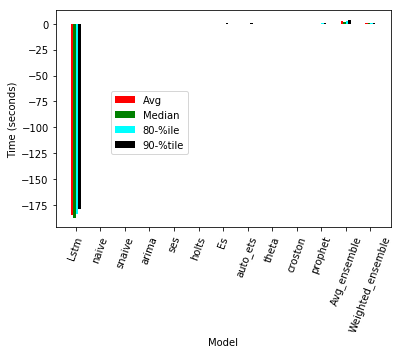

In [ ]:
%matplotlib inline
import numpy as np
avg_,med_,e80_,e90_,name=[],[],[],[],[]
#a=[MAPE_clus,MAPE_agg,WAPE_clus,WAPE_agg]
for k,v in Time.items():
    avg_.append(np.mean(v))
    med_.append(np.percentile(v,50))
    e80_.append(np.percentile(v,80))
    e90_.append(np.percentile(v,90))
    name.append(k)



x_axis = np.arange(len(Time))

# Multi bar Chart

bar_w=.1
plt.bar(x_axis -0.15, avg_, width=bar_w, label = 'Avg',color='red')
plt.bar(x_axis -0.05, med_, width=bar_w, label = 'Median',color='green')
plt.bar(x_axis +0.05, e80_, width=bar_w, label = '80-%ile',color='cyan')
plt.bar(x_axis +0.15, e90_, width=bar_w, label = '90-%tile',color='black')

plt.xticks(x_axis, Time.keys(),rotation = 70)
plt.legend(bbox_to_anchor=(0.41,0.65))
plt.ylabel('Time (seconds)')
plt.xlabel('Model')
plt.show()  

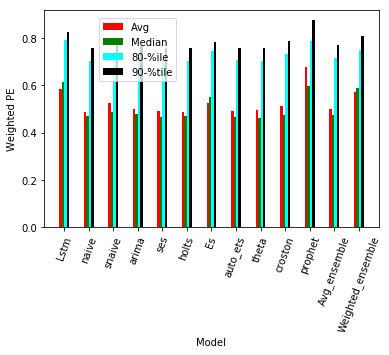

In [ ]:
import numpy as np
avg_,med_,e80_,e90_,name=[],[],[],[],[]
#a=[MAPE_clus,MAPE_agg,WAPE_clus,WAPE_agg]
for k,v in Pe.items():
    avg_.append(np.mean(v))
    med_.append(np.percentile(v,50))
    e80_.append(np.percentile(v,80))
    e90_.append(np.percentile(v,90))
    name.append(k)



x_axis = np.arange(len(Smape))

# Multi bar Chart
plt.bar(x_axis -0.15, avg_, width=bar_w, label = 'Avg',color='red')
plt.bar(x_axis -0.05, med_, width=bar_w, label = 'Median',color='green')
plt.bar(x_axis +0.05, e80_, width=bar_w, label = '80-%ile',color='cyan')
plt.bar(x_axis +0.15, e90_, width=bar_w, label = '90-%tile',color='black')

plt.xticks(x_axis, Smape.keys(),rotation = 70)
plt.legend(bbox_to_anchor=(0.41,0.65))
plt.ylabel('Weighted PE')
plt.xlabel('Model')
plt.show()  

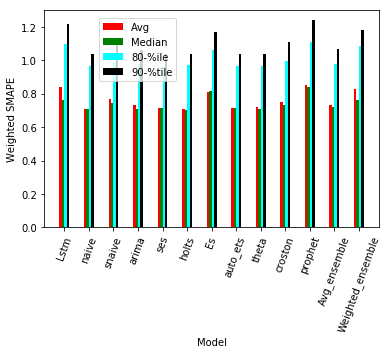

In [ ]:
import numpy as np
avg_,med_,e80_,e90_,name=[],[],[],[],[]
#a=[MAPE_clus,MAPE_agg,WAPE_clus,WAPE_agg]
for k,v in Smape.items():
    avg_.append(np.mean(v))
    med_.append(np.percentile(v,50))
    e80_.append(np.percentile(v,80))
    e90_.append(np.percentile(v,90))
    name.append(k)



x_axis = np.arange(len(Smape))

# Multi bar Chart
plt.bar(x_axis -0.15, avg_, width=bar_w, label = 'Avg',color='red')
plt.bar(x_axis -0.05, med_, width=bar_w, label = 'Median',color='green')
plt.bar(x_axis +0.05, e80_, width=bar_w, label = '80-%ile',color='cyan')
plt.bar(x_axis +0.15, e90_, width=bar_w, label = '90-%tile',color='black')

plt.xticks(x_axis, Smape.keys(),rotation = 70)
plt.legend(bbox_to_anchor=(0.41,0.65))
plt.ylabel('Weighted SMAPE')
plt.xlabel('Model')
plt.show()  

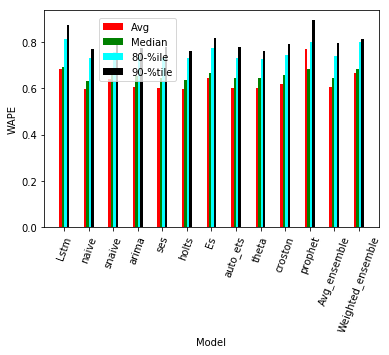

In [ ]:
import numpy as np
avg_,med_,e80_,e90_,name=[],[],[],[],[]
#a=[MAPE_clus,MAPE_agg,WAPE_clus,WAPE_agg]
for k,v in Wape.items():
    avg_.append(np.mean(v))
    med_.append(np.percentile(v,50))
    e80_.append(np.percentile(v,80))
    e90_.append(np.percentile(v,90))
    name.append(k)



x_axis = np.arange(len(Wape))

# Multi bar Chart
plt.bar(x_axis -0.15, avg_, width=bar_w, label = 'Avg',color='red')
plt.bar(x_axis -0.05, med_, width=bar_w, label = 'Median',color='green')
plt.bar(x_axis +0.05, e80_, width=bar_w, label = '80-%ile',color='cyan')
plt.bar(x_axis +0.15, e90_, width=bar_w, label = '90-%tile',color='black')

plt.xticks(x_axis, Wape.keys(),rotation = 70)
plt.legend(bbox_to_anchor=(0.41,0.65))
plt.ylabel('WAPE')
plt.xlabel('Model')
plt.show()

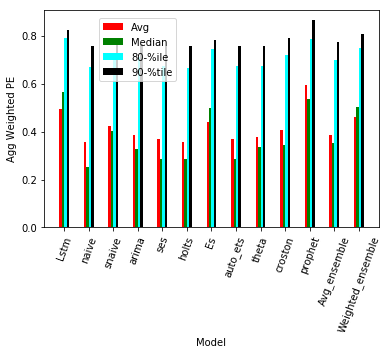

In [ ]:
import numpy as np
avg_,med_,e80_,e90_,name=[],[],[],[],[]
#a=[MAPE_clus,MAPE_agg,WAPE_clus,WAPE_agg]
for k,v in AggPes.items():
    avg_.append(np.mean(v))
    med_.append(np.percentile(v,50))
    e80_.append(np.percentile(v,80))
    e90_.append(np.percentile(v,90))
    name.append(k)



x_axis = np.arange(len(Wape))

# Multi bar Chart
plt.bar(x_axis -0.15, avg_, width=bar_w, label = 'Avg',color='red')
plt.bar(x_axis -0.05, med_, width=bar_w, label = 'Median',color='green')
plt.bar(x_axis +0.05, e80_, width=bar_w, label = '80-%ile',color='cyan')
plt.bar(x_axis +0.15, e90_, width=bar_w, label = '90-%tile',color='black')

plt.xticks(x_axis, Wape.keys(),rotation = 70)
plt.legend(bbox_to_anchor=(0.41,0.65))
plt.ylabel('Agg Weighted PE')
plt.xlabel('Model')
plt.show()

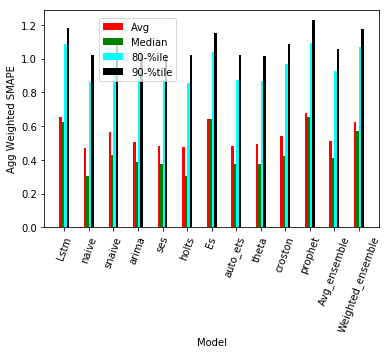

In [ ]:
import numpy as np
avg_,med_,e80_,e90_,name=[],[],[],[],[]
#a=[MAPE_clus,MAPE_agg,WAPE_clus,WAPE_agg]
for k,v in AggSmapes.items():
    avg_.append(np.mean(v))
    med_.append(np.percentile(v,50))
    e80_.append(np.percentile(v,80))
    e90_.append(np.percentile(v,90))
    name.append(k)



x_axis = np.arange(len(Wape))

# Multi bar Chart
plt.bar(x_axis -0.15, avg_, width=bar_w, label = 'Avg',color='red')
plt.bar(x_axis -0.05, med_, width=bar_w, label = 'Median',color='green')
plt.bar(x_axis +0.05, e80_, width=bar_w, label = '80-%ile',color='cyan')
plt.bar(x_axis +0.15, e90_, width=bar_w, label = '90-%tile',color='black')

plt.xticks(x_axis, Wape.keys(),rotation = 70)
plt.legend(bbox_to_anchor=(0.41,0.65))
plt.ylabel('Agg Weighted SMAPE')
plt.xlabel('Model')
plt.show()

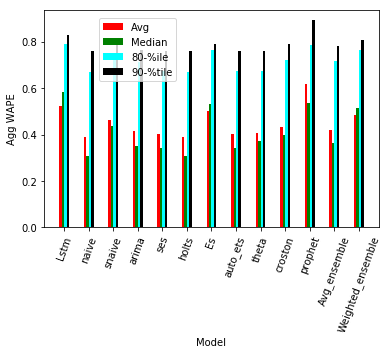

In [ ]:
import numpy as np
avg_,med_,e80_,e90_,name=[],[],[],[],[]
#a=[MAPE_clus,MAPE_agg,WAPE_clus,WAPE_agg]
for k,v in AggWapes.items():
    avg_.append(np.mean(v))
    med_.append(np.percentile(v,50))
    e80_.append(np.percentile(v,80))
    e90_.append(np.percentile(v,90))
    name.append(k)



x_axis = np.arange(len(Wape))

# Multi bar Chart
plt.bar(x_axis -0.15, avg_, width=bar_w, label = 'Avg',color='red')
plt.bar(x_axis -0.05, med_, width=bar_w, label = 'Median',color='green')
plt.bar(x_axis +0.05, e80_, width=bar_w, label = '80-%ile',color='cyan')
plt.bar(x_axis +0.15, e90_, width=bar_w, label = '90-%tile',color='black')

plt.xticks(x_axis, Wape.keys(),rotation = 70)
plt.legend(bbox_to_anchor=(0.41,0.65))
plt.ylabel('Agg WAPE')
plt.xlabel('Model')
plt.show()

0.684756641439167 0.6916307104292704


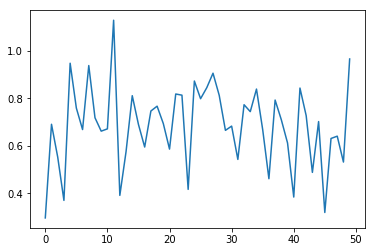

In [ ]:
print(np.mean(Wape['Lstm']),np.median(Wape['Lstm']))
plt.plot(Wape['Lstm'])

In [ ]:
################LSTM##########################
name=['September','October','November','December','January','February','March','April','May','June','July','August']
################LSTM##########################
from torch.optim.lr_scheduler import ExponentialLR
TimesL=[]
SMAPEsL=[]
PEsL=[]
WAPEsL=[]
AggSmapeL=[]
AggWapeL=[]
AggPeL=[]
times_org=[]
median_smape,median_wape,median_pe=[],[],[]
Eighty_per_smape,Eighty_per_wape,Eighty_per_pe=[],[],[]
Ninty_per_smape,Ninty_per_wape,Ninty_per_pe=[],[],[]
wape_agg_lstm=np.zeros(50, dtype=np.float64)
df_lstm=np.zeros((30,50), dtype=np.float64)
################LSTM##########################
month=1
print('Running for the month of :',name[month])
################LSTM##########################
################LSTM##########################
################LSTM##########################
for i in range(50):
    print('cluster id: ',i+1)
    current_date = '20220831'
    test_group_id = test_group_id_list[i]#'/3944/1060825/447913'
    #for top cluster:
    path = f"gs://adtech-artifacts/ds/forecast/month_eval/query_taxonomy_clusters_sample{'_'.join(test_group_id.split('/'))}_tft_data_{current_date}.csv"
    #path = f"gs://adtech-artifacts/ds/forecast/month_eval/tail_clusters/query_taxonomy_clusters_sample{'_'.join(test_group_id.split('/'))}_data_20220831.csv"
    # read in data
    df_panda = spark.read.option("header", True).csv(path).toPandas() # The usage should be the same as previous
    df_panda=df_panda[['ds', 'group_id', 'query_idx', 'SearchKeyValue',  'LocationKeyValue', 'daily_supply']]
    #df_panda=spark.read.csv("gs://adtech-artifacts/ds/forecast/query_taxonomy_sample_Addedfeatures_cluster_"+str(i)+".csv",header=True).toPandas()
    Cols=['daily_supply']#, 'shifted_annual_daily_supply','Trend_Var','dayofyear_sin', 'dayofyear_cos', 'month_sin', 'month_cos']
    for cols in Cols:  
        df_panda[cols]=df_panda[cols].astype(float,errors='raise')
    start=time.time()
    minError=1e10
    param = {
        "learning_rate": [.1,.01,.001],
        "hidden_size": [10,20],
        'batch_size': [32],
        'dropout': [0.05,.1],
        'gamma': [0.9],
        'optimizer_name': ['AdamW'],
        'num_layer': [1,2],
        'relu': [False]
    }
    prep = dataprep(df_panda, input_window=90, output_window=30, stride=1,start=start_month[month])
    print('Beginning the training...')
    train_set_in, train_set_out, val_set_in, val_set_out, test_in_set, test_out_set,df_test_org,  q,wq = prep._get_data()
    #print('print len of q, value and wq value',len(q),q[0],wq[0])
    train_set_in = torch.from_numpy(train_set_in.astype(np.float64)).float()
    train_set_out = torch.from_numpy(train_set_out.astype(np.float64)).float()
    val_set_in = torch.from_numpy(val_set_in.astype(np.float64)).float()
    val_set_out = torch.from_numpy(val_set_out.astype(np.float64)).float()
    test_in_set = torch.from_numpy(test_in_set.astype(np.float64)).float()
    test_out_set = torch.from_numpy(test_out_set.astype(np.float64)).float()
    print('val shape is: ',val_set_in.shape, val_set_out.shape)
    end1=time.time()
    if len(train_set_in.shape) < 3:
        train_set_in = train_set_in.reshape(train_set_in.shape[0], train_set_in.shape[1], 1)
        val_set_in = val_set_in.reshape(val_set_in.shape[0], val_set_in.shape[1], 1)
        test_in_set = test_in_set.reshape(test_in_set.shape[0], test_in_set.shape[1], 1)
        test_out_set=test_out_set.reshape(test_out_set.shape[0], test_out_set.shape[1])
    counter=1
    for lr in param['learning_rate']:
        for h_s in param['hidden_size']:
            for b_s in param['batch_size']:
                for dp in param['dropout']:
                    for opt in param['optimizer_name']:
                        for n_l in param['num_layer']:
                            for act in param['relu']:
                                for gm in param['gamma']:
                                    config = {
                                        "num_epochs": 200,
                                        "learning_rate": lr,
                                        "hidden_size": h_s,
                                        "window_size": 30,
                                        "output_size": 30,
                                        'batch_size': b_s,
                                        'dropout': dp,
                                        'dropout1': 0,
                                        'gamma': gm,
                                        'optimizer_name': opt,
                                        'num_layer': n_l,
                                        'relu': act
                                    }
                                    print('trial run: ',counter)
                                    counter+=1
                                    e1,e2,e3,model = running_lstm(config, save_model=True)
                                    if (e1+e2+e3)/3<minError:
                                        minError=(e1+e2+e3)/3
                                        best_config=config
                                        best_model=model
                                        print('the  smape is {} wape is {} and pe is {} and total is {}'.format(e1,e2,e3,(e1+e2+e3)/3))
                                        print('the config is {}',config)
    if minError>=.7:
        param = {
        "learning_rate": [.001,.0001],
        "hidden_size": [15,30],
        'batch_size': [32],
        'dropout': [.05,.5],
        'gamma': [0.9],
        'optimizer_name': ['Adam','AdamW'],
        'num_layer': [3,5],
        'relu': [True]}
        for lr in param['learning_rate']:
            for h_s in param['hidden_size']:
                for b_s in param['batch_size']:
                    for dp in param['dropout']:
                        for opt in param['optimizer_name']:
                            for n_l in param['num_layer']:
                                for act in param['relu']:
                                    for gm in param['gamma']:
                                        config = {
                                            "num_epochs": 200,
                                            "learning_rate": lr,
                                            "hidden_size": h_s,
                                            "window_size": 30,
                                            "output_size": 30,
                                            'batch_size': b_s,
                                            'dropout': dp,
                                            'dropout1': 0,
                                            'gamma': gm,
                                            'optimizer_name': opt,
                                            'num_layer': n_l,
                                            'relu': act
                                        }
                                        print('trial run: ',counter)
                                        counter+=1
                                        e1,e2,e3,model = running_lstm(config, save_model=True)
                                        
                                        #print('the config is {}',config)
                                        if (e1+e2+e3)/3<minError:
                                            minError=(e1+e2+e3)/3
                                            best_config=config
                                            best_model=model
                                            print(best_model)
                                            print('the  smape is {} wape is {} and pe is {} and total is {}'.format(e1,e2,e3,(e1+e2+e3)/3))
                                            print('the config is {}',config)

    end = time.time()
    print('thus best config is', best_config)
    Wsmape, Wape, Wpe, smape_dis, wape_dis, pe_dis, smape_agg, wape_agg, pe_agg, model, df_lstm[:,i],wape_agg_lstm[i] = check_lstm(best_config, best_model)
    print('val wape is: ',wape_agg_lstm[i])
    print('total time ', end1 - end)
    print('test Wsmape: ', Wsmape, ' test Wape: ', Wape, ' test Wpe: ', Wpe)
    print('Smape dis',smape_dis,'Wape dis',wape_dis,'PE dis',pe_dis)
    print('Agg SMAPE: ',smape_agg,'Agg WAPE: ',wape_agg,'Agg PE: ',pe_agg)
    print('total time ', end1 - end)

    #print('time needed to run the model: ',end-start)
    AggSmapeL.append(smape_agg)
    AggWapeL.append(wape_agg)
    AggPeL.append(pe_agg)
    SMAPEsL.append(Wsmape)
    WAPEsL.append(Wape)
    PEsL.append(Wpe)
    median_smape.append(smape_dis[0])
    Eighty_per_smape.append(smape_dis[1])
    Ninty_per_smape.append(smape_dis[2])
    median_wape.append(wape_dis[0])
    Eighty_per_wape.append(wape_dis[1])
    Ninty_per_wape.append(wape_dis[2])
    median_pe.append(pe_dis[0])
    Eighty_per_pe.append(pe_dis[1])
    Ninty_per_pe.append(pe_dis[2])
    TimesL.append(end1-end)
    times_org.append(end1-start)
    print('===============================================')

Running for the month of : October
cluster id:  1
Beginning the training...
val shape is:  torch.Size([61, 90, 1]) torch.Size([61, 30])
trial run:  1
the  smape is 0.13780926167964935 wape is 0.1331251561641693 and pe is 0.08637341111898422 and total is 0.11910260717074077
the config is {} {'num_epochs': 200, 'learning_rate': 0.1, 'hidden_size': 10, 'window_size': 30, 'output_size': 30, 'batch_size': 32, 'dropout': 0.05, 'dropout1': 0, 'gamma': 0.9, 'optimizer_name': 'AdamW', 'num_layer': 1, 'relu': False}
trial run:  2
the  smape is 0.11313740164041519 wape is 0.11245818436145782 and pe is 0.012121422216296196 and total is 0.07923900584379832
the config is {} {'num_epochs': 200, 'learning_rate': 0.1, 'hidden_size': 10, 'window_size': 30, 'output_size': 30, 'batch_size': 32, 'dropout': 0.05, 'dropout1': 0, 'gamma': 0.9, 'optimizer_name': 'AdamW', 'num_layer': 2, 'relu': False}
trial run:  3
trial run:  4
trial run:  5
the  smape is 0.1146872490644455 wape is 0.11343083530664444 and pe 

In [ ]:
print('TimesL=',TimesL)
print('SMAPEsL=',SMAPEsL)
print('PEsL=',PEsL)
print('WAPEsL=',WAPEsL)
print('AggSmapeL=',AggSmapeL)
print('AggWapeL=',AggWapeL)
print('AggPeL=',AggPeL)
print('times_org=',times_org)
print('median_smape=',median_smape)
print('median_wape=',median_wape)
print('median_pe=',median_pe)
print('Eighty_per_smape=',Eighty_per_smape)
print('Eighty_per_wape=',Eighty_per_wape)
print('Eighty_per_pe=',Eighty_per_pe)
print('Ninty_per_smape=',Ninty_per_smape)
print('Ninty_per_wape=',Ninty_per_wape)
print('Ninty_per_pe=',Ninty_per_pe)

In [ ]:
Times=[]
SMAPEs=[]
WAPEs=[]
PEs=[]
AggSmape=[]
AggWape=[]
AggPe=[]
SMAPEs_dist=[]
WAPEs_dist=[]
PEs_dist=[]
training_j=[]


for i in range(50):
    st=time.time()
    print('cluster id: ',i+1)
    current_date = '20220831'
    test_group_id = test_group_id_list[i]#'/3944/1060825/447913'
    print('group id',test_group_id)
    #for top cluster:
    path = f"gs://adtech-artifacts/ds/forecast/month_eval/query_taxonomy_clusters_sample{'_'.join(test_group_id.split('/'))}_tft_data_{current_date}.csv"
    #path = f"gs://adtech-artifacts/ds/forecast/month_eval/tail_clusters/query_taxonomy_clusters_sample{'_'.join(test_group_id.split('/'))}_data_20220831.csv"
    # read in data
    df = spark.read.option("header", True).csv(path).toPandas() # The usage should be the same as previous
    df=df[['ds', 'group_id', 'query_idx', 'SearchKeyValue',  'LocationKeyValue', 'daily_supply']]
    #print('query id: ',df['query_idx'].unique())
    #df_panda=spark.read.csv("gs://adtech-artifacts/ds/forecast/query_taxonomy_sample_Addedfeatures_cluster_"+str(i)+".csv",header=True).toPandas()
    Cols=['daily_supply']#, 'shifted_annual_daily_supply','Trend_Var','dayofyear_sin', 'dayofyear_cos', 'month_sin', 'month_cos']
    for cols in Cols:df[cols]=df[cols].astype(float,errors='raise')
    #print('time needed to preprocess the data is: ',time.time()-st)
    df_train,df_test,train_date,test_date,q,wq=_generate_train_test_data(df,start=start_month[month])
    df_trainW,df_valW,_,train_dateW,_,_,_=_generate_train_test_data(df,val_req=True,start=start_month[month])
    df1_train,df1_test=df_train.sum(axis=1),df_test.sum(axis=1)
    df1_trainW,df_valW=df_trainW.sum(axis=1),df_valW.sum(axis=1)
    df1_train,df1_trainW,df_valW=df1_train.to_frame(),df1_trainW.to_frame(),df_valW.to_frame()
    df1_train.index=train_date
    df1_trainW.index=train_dateW
    df1_train.index = df1_train.index.to_period(freq = 'D')
    df1_trainW.index = df1_trainW.index.to_period(freq = 'D')
    #df_test_log_temp.index = df_test_log_temp.index.to_period(freq = 'D')
    df1_train=df1_train.rename(columns={0:'daily_supply'})
    df1_trainW=df1_trainW.rename(columns={0:'daily_supply'})
#     if i==0:
#         print(q,wq)
    start=time.time()
    Models=statModels()

    Models.clus_smape['Lstm']=AggSmapeL[i]
    Models.clus_wape['Lstm']=AggWapeL[i]
    Models.clus_pe['Lstm']=AggPeL[i]
    #Models.models['Lstm'] = fit4
    #self.stores_mape['Es'] = mape
    Models.stores_smape['Lstm'] = SMAPEsL[i]
    Models.store_wape['Lstm'] = WAPEsL[i]
    Models.store_pe['Lstm'] = PEsL[i]
    Models.smape_dis['Lstm']=[median_smape[i],Eighty_per_smape[i],Ninty_per_smape[i]]
    Models.wape_dis['Lstm']=[median_wape[i],Eighty_per_wape[i],Ninty_per_wape[i]]
    Models.pe_dis['Lstm']=[median_pe[i],Eighty_per_pe[i],Ninty_per_pe[i]]
    Models.stores_times['Lstm'] = TimesL[i]
    ##################
    #Models.wape_Weighted['Lstm'] = wape_agg_lstm[i]

    Models.training_infer(df1_train,df1_test,df_test,q.values,wq.values,df1_test.shape[0],df_lstm[:,i])#no_ts
    Models.weighted_avg(df1_trainW, df1_test,df_valW.values, df_test,q.values,wq.values, forecast_period=60,lstm_pred=df_lstm[:,i])

    end=time.time()
    print('Wape is: ',Models.store_wape)
    print('Smape is: ',Models.stores_smape)
    print('Time is:' ,Models.stores_times)
    #print('time needed to run the model: ',end-start)
    SMAPEs.append(Models.stores_smape)
    WAPEs.append(Models.store_wape)
    PEs.append(Models.store_pe)
    Times.append(Models.stores_times)
    AggSmape.append(Models.clus_smape)
    AggWape.append(Models.clus_wape)
    AggPe.append(Models.clus_pe)
    SMAPEs_dist.append(Models.smape_dis)
    WAPEs_dist.append(Models.wape_dis)
    PEs_dist.append(Models.pe_dis)
    training_j.append(i)

    print('===============================================')
    

In [ ]:
Smape={i:[] for i in SMAPEs[0]}
Wape={i:[] for i in WAPEs[0]}
Pe={i:[] for i in PEs[0]}
Time={i:[] for i in Times[0]}

AggSmapes={i:[] for i in AggSmape[0]}
AggWapes={i:[] for i in AggWape[0]}
AggPes={i:[] for i in AggPe[0]}

SMAPE_dist_median={i:[] for i in SMAPEs_dist[0]}
SMAPE_dist_80={i:[] for i in SMAPEs_dist[0]}
SMAPE_dist_90={i:[] for i in SMAPEs_dist[0]}

WAPE_dist_median={i:[] for i in WAPEs_dist[0]}
WAPE_dist_80={i:[] for i in WAPEs_dist[0]}
WAPE_dist_90={i:[] for i in WAPEs_dist[0]}


PE_dist_median={i:[] for i in PEs_dist[0]}
PE_dist_80={i:[] for i in PEs_dist[0]}
PE_dist_90={i:[] for i in PEs_dist[0]}
for i in range(len(training_j)):
    for keys,values in SMAPEs[i].items():
        Smape[keys].append(values)
    for keys,values in WAPEs[i].items():
        Wape[keys].append(values)
    for keys,values in PEs[i].items():
        Pe[keys].append(values)

    for keys,values in Times[i].items():
        Time[keys].append(values)
    for keys,values in AggSmape[i].items():
        AggSmapes[keys].append(values)
    for keys,values in AggWape[i].items():
        AggWapes[keys].append(values)
    for keys,values in AggPe[i].items():
        AggPes[keys].append(values)
    
    for keys,values in SMAPEs_dist[i].items():
        SMAPE_dist_median[keys].append(values[0])
    for keys,values in SMAPEs_dist[i].items():
        SMAPE_dist_80[keys].append(values[1])
    for keys,values in SMAPEs_dist[i].items():
        SMAPE_dist_90[keys].append(values[2])
        
    for keys,values in WAPEs_dist[i].items():
        WAPE_dist_median[keys].append(values[0])
    for keys,values in WAPEs_dist[i].items():
        WAPE_dist_80[keys].append(values[1])
    for keys,values in WAPEs_dist[i].items():
        WAPE_dist_90[keys].append(values[2])
        
    for keys,values in PEs_dist[i].items():
        PE_dist_median[keys].append(values[0])
    for keys,values in PEs_dist[i].items():
        PE_dist_80[keys].append(values[1])
    for keys,values in PEs_dist[i].items():
        PE_dist_90[keys].append(values[2])
print('Smape is: ',Smape)
print('====================')
print('Wape is: ',Wape)
print('====================')
print('Pe is: ',Pe)
print('====================')
print('Time is: ',Time)
print('====================')
print('AggSmapes is: ',AggSmapes)
print('====================')
print('AggWapes is: ',AggWapes)
print('====================')
print('AggPes is: ',AggPes)
print('====================')
print('SMAPE_dist_median is: ',SMAPE_dist_median)
print('====================')
print('SMAPE_dist_80 is: ',SMAPE_dist_80)
print('====================')
print('SMAPE_dist_90 is: ',SMAPE_dist_90)
print('====================')
print('WAPE_dist_median is: ',WAPE_dist_median)
print('====================')
print('WAPE_dist_80 is: ',WAPE_dist_80)
print('====================')
print('WAPE_dist_90 is: ',WAPE_dist_90)
print('====================')
print('PE_dist_median is: ',PE_dist_median)
print('====================')
print('PE_dist_80 is: ',PE_dist_80)
print('====================')
print('SmapePE_dist_90 is: ',PE_dist_90)
print('====================')
print('Original LSTM time is', times_org)

In [ ]:
################LSTM##########################
name=['September','October','November','December','January','February','March','April','May','June','July','August']
################LSTM##########################
from torch.optim.lr_scheduler import ExponentialLR
TimesL=[]
SMAPEsL=[]
PEsL=[]
WAPEsL=[]
AggSmapeL=[]
AggWapeL=[]
AggPeL=[]
times_org=[]
median_smape,median_wape,median_pe=[],[],[]
Eighty_per_smape,Eighty_per_wape,Eighty_per_pe=[],[],[]
Ninty_per_smape,Ninty_per_wape,Ninty_per_pe=[],[],[]
wape_agg_lstm=np.zeros(50, dtype=np.float64)
df_lstm=np.zeros((30,50), dtype=np.float64)
################LSTM##########################
month=2
print('Running for the month of :',name[month])
################LSTM##########################
################LSTM##########################
################LSTM##########################
for i in range(50):
    print('cluster id: ',i+1)
    current_date = '20220831'
    test_group_id = test_group_id_list[i]#'/3944/1060825/447913'
    #for top cluster:
    path = f"gs://adtech-artifacts/ds/forecast/month_eval/query_taxonomy_clusters_sample{'_'.join(test_group_id.split('/'))}_tft_data_{current_date}.csv"
    #path = f"gs://adtech-artifacts/ds/forecast/month_eval/tail_clusters/query_taxonomy_clusters_sample{'_'.join(test_group_id.split('/'))}_data_20220831.csv"
    # read in data
    df_panda = spark.read.option("header", True).csv(path).toPandas() # The usage should be the same as previous
    df_panda=df_panda[['ds', 'group_id', 'query_idx', 'SearchKeyValue',  'LocationKeyValue', 'daily_supply']]
    #df_panda=spark.read.csv("gs://adtech-artifacts/ds/forecast/query_taxonomy_sample_Addedfeatures_cluster_"+str(i)+".csv",header=True).toPandas()
    Cols=['daily_supply']#, 'shifted_annual_daily_supply','Trend_Var','dayofyear_sin', 'dayofyear_cos', 'month_sin', 'month_cos']
    for cols in Cols:  
        df_panda[cols]=df_panda[cols].astype(float,errors='raise')
    start=time.time()
    minError=1e10
    param = {
        "learning_rate": [.1,.01,.001],
        "hidden_size": [10,20],
        'batch_size': [32],
        'dropout': [0.05,.1],
        'gamma': [0.9],
        'optimizer_name': ['AdamW'],
        'num_layer': [1,2],
        'relu': [False]
    }
    prep = dataprep(df_panda, input_window=90, output_window=30, stride=1,start=start_month[month])
    print('Beginning the training...')
    train_set_in, train_set_out, val_set_in, val_set_out, test_in_set, test_out_set,df_test_org,  q,wq = prep._get_data()
    #print('print len of q, value and wq value',len(q),q[0],wq[0])
    train_set_in = torch.from_numpy(train_set_in.astype(np.float64)).float()
    train_set_out = torch.from_numpy(train_set_out.astype(np.float64)).float()
    val_set_in = torch.from_numpy(val_set_in.astype(np.float64)).float()
    val_set_out = torch.from_numpy(val_set_out.astype(np.float64)).float()
    test_in_set = torch.from_numpy(test_in_set.astype(np.float64)).float()
    test_out_set = torch.from_numpy(test_out_set.astype(np.float64)).float()
    print('val shape is: ',val_set_in.shape, val_set_out.shape)
    end1=time.time()
    if len(train_set_in.shape) < 3:
        train_set_in = train_set_in.reshape(train_set_in.shape[0], train_set_in.shape[1], 1)
        val_set_in = val_set_in.reshape(val_set_in.shape[0], val_set_in.shape[1], 1)
        test_in_set = test_in_set.reshape(test_in_set.shape[0], test_in_set.shape[1], 1)
        test_out_set=test_out_set.reshape(test_out_set.shape[0], test_out_set.shape[1])
    counter=1
    for lr in param['learning_rate']:
        for h_s in param['hidden_size']:
            for b_s in param['batch_size']:
                for dp in param['dropout']:
                    for opt in param['optimizer_name']:
                        for n_l in param['num_layer']:
                            for act in param['relu']:
                                for gm in param['gamma']:
                                    config = {
                                        "num_epochs": 200,
                                        "learning_rate": lr,
                                        "hidden_size": h_s,
                                        "window_size": 30,
                                        "output_size": 30,
                                        'batch_size': b_s,
                                        'dropout': dp,
                                        'dropout1': 0,
                                        'gamma': gm,
                                        'optimizer_name': opt,
                                        'num_layer': n_l,
                                        'relu': act
                                    }
                                    print('trial run: ',counter)
                                    counter+=1
                                    e1,e2,e3,model = running_lstm(config, save_model=True)
                                    if (e1+e2+e3)/3<minError:
                                        minError=(e1+e2+e3)/3
                                        best_config=config
                                        best_model=model
                                        print('the  smape is {} wape is {} and pe is {} and total is {}'.format(e1,e2,e3,(e1+e2+e3)/3))
                                        print('the config is {}',config)
    if minError>=.7:
        param = {
        "learning_rate": [.001,.0001],
        "hidden_size": [15,30],
        'batch_size': [32],
        'dropout': [.05,.5],
        'gamma': [0.9],
        'optimizer_name': ['Adam','AdamW'],
        'num_layer': [3,5],
        'relu': [True]}
        for lr in param['learning_rate']:
            for h_s in param['hidden_size']:
                for b_s in param['batch_size']:
                    for dp in param['dropout']:
                        for opt in param['optimizer_name']:
                            for n_l in param['num_layer']:
                                for act in param['relu']:
                                    for gm in param['gamma']:
                                        config = {
                                            "num_epochs": 200,
                                            "learning_rate": lr,
                                            "hidden_size": h_s,
                                            "window_size": 30,
                                            "output_size": 30,
                                            'batch_size': b_s,
                                            'dropout': dp,
                                            'dropout1': 0,
                                            'gamma': gm,
                                            'optimizer_name': opt,
                                            'num_layer': n_l,
                                            'relu': act
                                        }
                                        print('trial run: ',counter)
                                        counter+=1
                                        e1,e2,e3,model = running_lstm(config, save_model=True)
                                        
                                        #print('the config is {}',config)
                                        if (e1+e2+e3)/3<minError:
                                            minError=(e1+e2+e3)/3
                                            best_config=config
                                            best_model=model
                                            print(best_model)
                                            print('the  smape is {} wape is {} and pe is {} and total is {}'.format(e1,e2,e3,(e1+e2+e3)/3))
                                            print('the config is {}',config)

    end = time.time()
    print('thus best config is', best_config)
    Wsmape, Wape, Wpe, smape_dis, wape_dis, pe_dis, smape_agg, wape_agg, pe_agg, model, df_lstm[:,i],wape_agg_lstm[i] = check_lstm(best_config, best_model)
    print('val wape is: ',wape_agg_lstm[i])
    print('total time ', end1 - end)
    print('test Wsmape: ', Wsmape, ' test Wape: ', Wape, ' test Wpe: ', Wpe)
    print('Smape dis',smape_dis,'Wape dis',wape_dis,'PE dis',pe_dis)
    print('Agg SMAPE: ',smape_agg,'Agg WAPE: ',wape_agg,'Agg PE: ',pe_agg)
    print('total time ', end1 - end)

    #print('time needed to run the model: ',end-start)
    AggSmapeL.append(smape_agg)
    AggWapeL.append(wape_agg)
    AggPeL.append(pe_agg)
    SMAPEsL.append(Wsmape)
    WAPEsL.append(Wape)
    PEsL.append(Wpe)
    median_smape.append(smape_dis[0])
    Eighty_per_smape.append(smape_dis[1])
    Ninty_per_smape.append(smape_dis[2])
    median_wape.append(wape_dis[0])
    Eighty_per_wape.append(wape_dis[1])
    Ninty_per_wape.append(wape_dis[2])
    median_pe.append(pe_dis[0])
    Eighty_per_pe.append(pe_dis[1])
    Ninty_per_pe.append(pe_dis[2])
    TimesL.append(end1-end)
    times_org.append(end1-start)
    print('===============================================')

In [ ]:
print('TimesL=',TimesL)
print('SMAPEsL=',SMAPEsL)
print('PEsL=',PEsL)
print('WAPEsL=',WAPEsL)
print('AggSmapeL=',AggSmapeL)
print('AggWapeL=',AggWapeL)
print('AggPeL=',AggPeL)
print('times_org=',times_org)
print('median_smape=',median_smape)
print('median_wape=',median_wape)
print('median_pe=',median_pe)
print('Eighty_per_smape=',Eighty_per_smape)
print('Eighty_per_wape=',Eighty_per_wape)
print('Eighty_per_pe=',Eighty_per_pe)
print('Ninty_per_smape=',Ninty_per_smape)
print('Ninty_per_wape=',Ninty_per_wape)
print('Ninty_per_pe=',Ninty_per_pe)

In [ ]:
Times=[]
SMAPEs=[]
WAPEs=[]
PEs=[]
AggSmape=[]
AggWape=[]
AggPe=[]
SMAPEs_dist=[]
WAPEs_dist=[]
PEs_dist=[]
training_j=[]


for i in range(50):
    st=time.time()
    print('cluster id: ',i+1)
    current_date = '20220831'
    test_group_id = test_group_id_list[i]#'/3944/1060825/447913'
    print('group id',test_group_id)
    #for top cluster:
    path = f"gs://adtech-artifacts/ds/forecast/month_eval/query_taxonomy_clusters_sample{'_'.join(test_group_id.split('/'))}_tft_data_{current_date}.csv"
    #path = f"gs://adtech-artifacts/ds/forecast/month_eval/tail_clusters/query_taxonomy_clusters_sample{'_'.join(test_group_id.split('/'))}_data_20220831.csv"
    # read in data
    df = spark.read.option("header", True).csv(path).toPandas() # The usage should be the same as previous
    df=df[['ds', 'group_id', 'query_idx', 'SearchKeyValue',  'LocationKeyValue', 'daily_supply']]
    #print('query id: ',df['query_idx'].unique())
    #df_panda=spark.read.csv("gs://adtech-artifacts/ds/forecast/query_taxonomy_sample_Addedfeatures_cluster_"+str(i)+".csv",header=True).toPandas()
    Cols=['daily_supply']#, 'shifted_annual_daily_supply','Trend_Var','dayofyear_sin', 'dayofyear_cos', 'month_sin', 'month_cos']
    for cols in Cols:df[cols]=df[cols].astype(float,errors='raise')
    #print('time needed to preprocess the data is: ',time.time()-st)
    df_train,df_test,train_date,test_date,q,wq=_generate_train_test_data(df,start=start_month[month])
    df_trainW,df_valW,_,train_dateW,_,_,_=_generate_train_test_data(df,val_req=True,start=start_month[month])
    df1_train,df1_test=df_train.sum(axis=1),df_test.sum(axis=1)
    df1_trainW,df_valW=df_trainW.sum(axis=1),df_valW.sum(axis=1)
    df1_train,df1_trainW,df_valW=df1_train.to_frame(),df1_trainW.to_frame(),df_valW.to_frame()
    df1_train.index=train_date
    df1_trainW.index=train_dateW
    df1_train.index = df1_train.index.to_period(freq = 'D')
    df1_trainW.index = df1_trainW.index.to_period(freq = 'D')
    #df_test_log_temp.index = df_test_log_temp.index.to_period(freq = 'D')
    df1_train=df1_train.rename(columns={0:'daily_supply'})
    df1_trainW=df1_trainW.rename(columns={0:'daily_supply'})
#     if i==0:
#         print(q,wq)
    start=time.time()
    Models=statModels()

    Models.clus_smape['Lstm']=AggSmapeL[i]
    Models.clus_wape['Lstm']=AggWapeL[i]
    Models.clus_pe['Lstm']=AggPeL[i]
    #Models.models['Lstm'] = fit4
    #self.stores_mape['Es'] = mape
    Models.stores_smape['Lstm'] = SMAPEsL[i]
    Models.store_wape['Lstm'] = WAPEsL[i]
    Models.store_pe['Lstm'] = PEsL[i]
    Models.smape_dis['Lstm']=[median_smape[i],Eighty_per_smape[i],Ninty_per_smape[i]]
    Models.wape_dis['Lstm']=[median_wape[i],Eighty_per_wape[i],Ninty_per_wape[i]]
    Models.pe_dis['Lstm']=[median_pe[i],Eighty_per_pe[i],Ninty_per_pe[i]]
    Models.stores_times['Lstm'] = TimesL[i]
    ##################
    #Models.wape_Weighted['Lstm'] = wape_agg_lstm[i]

    Models.training_infer(df1_train,df1_test,df_test,q.values,wq.values,df1_test.shape[0],df_lstm[:,i])#no_ts
    Models.weighted_avg(df1_trainW, df1_test,df_valW.values, df_test,q.values,wq.values, forecast_period=60,lstm_pred=df_lstm[:,i])

    end=time.time()
    print('Wape is: ',Models.store_wape)
    print('Smape is: ',Models.stores_smape)
    print('Time is:' ,Models.stores_times)
    #print('time needed to run the model: ',end-start)
    SMAPEs.append(Models.stores_smape)
    WAPEs.append(Models.store_wape)
    PEs.append(Models.store_pe)
    Times.append(Models.stores_times)
    AggSmape.append(Models.clus_smape)
    AggWape.append(Models.clus_wape)
    AggPe.append(Models.clus_pe)
    SMAPEs_dist.append(Models.smape_dis)
    WAPEs_dist.append(Models.wape_dis)
    PEs_dist.append(Models.pe_dis)
    training_j.append(i)

    print('===============================================')
    

In [ ]:
Smape={i:[] for i in SMAPEs[0]}
Wape={i:[] for i in WAPEs[0]}
Pe={i:[] for i in PEs[0]}
Time={i:[] for i in Times[0]}

AggSmapes={i:[] for i in AggSmape[0]}
AggWapes={i:[] for i in AggWape[0]}
AggPes={i:[] for i in AggPe[0]}

SMAPE_dist_median={i:[] for i in SMAPEs_dist[0]}
SMAPE_dist_80={i:[] for i in SMAPEs_dist[0]}
SMAPE_dist_90={i:[] for i in SMAPEs_dist[0]}

WAPE_dist_median={i:[] for i in WAPEs_dist[0]}
WAPE_dist_80={i:[] for i in WAPEs_dist[0]}
WAPE_dist_90={i:[] for i in WAPEs_dist[0]}


PE_dist_median={i:[] for i in PEs_dist[0]}
PE_dist_80={i:[] for i in PEs_dist[0]}
PE_dist_90={i:[] for i in PEs_dist[0]}
for i in range(len(training_j)):
    for keys,values in SMAPEs[i].items():
        Smape[keys].append(values)
    for keys,values in WAPEs[i].items():
        Wape[keys].append(values)
    for keys,values in PEs[i].items():
        Pe[keys].append(values)

    for keys,values in Times[i].items():
        Time[keys].append(values)
    for keys,values in AggSmape[i].items():
        AggSmapes[keys].append(values)
    for keys,values in AggWape[i].items():
        AggWapes[keys].append(values)
    for keys,values in AggPe[i].items():
        AggPes[keys].append(values)
    
    for keys,values in SMAPEs_dist[i].items():
        SMAPE_dist_median[keys].append(values[0])
    for keys,values in SMAPEs_dist[i].items():
        SMAPE_dist_80[keys].append(values[1])
    for keys,values in SMAPEs_dist[i].items():
        SMAPE_dist_90[keys].append(values[2])
        
    for keys,values in WAPEs_dist[i].items():
        WAPE_dist_median[keys].append(values[0])
    for keys,values in WAPEs_dist[i].items():
        WAPE_dist_80[keys].append(values[1])
    for keys,values in WAPEs_dist[i].items():
        WAPE_dist_90[keys].append(values[2])
        
    for keys,values in PEs_dist[i].items():
        PE_dist_median[keys].append(values[0])
    for keys,values in PEs_dist[i].items():
        PE_dist_80[keys].append(values[1])
    for keys,values in PEs_dist[i].items():
        PE_dist_90[keys].append(values[2])
print('Smape is: ',Smape)
print('====================')
print('Wape is: ',Wape)
print('====================')
print('Pe is: ',Pe)
print('====================')
print('Time is: ',Time)
print('====================')
print('AggSmapes is: ',AggSmapes)
print('====================')
print('AggWapes is: ',AggWapes)
print('====================')
print('AggPes is: ',AggPes)
print('====================')
print('SMAPE_dist_median is: ',SMAPE_dist_median)
print('====================')
print('SMAPE_dist_80 is: ',SMAPE_dist_80)
print('====================')
print('SMAPE_dist_90 is: ',SMAPE_dist_90)
print('====================')
print('WAPE_dist_median is: ',WAPE_dist_median)
print('====================')
print('WAPE_dist_80 is: ',WAPE_dist_80)
print('====================')
print('WAPE_dist_90 is: ',WAPE_dist_90)
print('====================')
print('PE_dist_median is: ',PE_dist_median)
print('====================')
print('PE_dist_80 is: ',PE_dist_80)
print('====================')
print('SmapePE_dist_90 is: ',PE_dist_90)
print('====================')
print('Original LSTM time is', times_org)